# Analysis of Cancer Cell Data using AI methods

## Description:

This data set is made from 570 cancer cells analysis of 30 features to determine whether the cancer cells in our data are benign(B) or malignant(M)

Stages of the project:

1. Data Preprocessing
2. Identification of the target concept
3. Definition of the training and test sets
4. Selection and parameterization of the learning algorithms to employ
5. Evaluation of the learning process (in particular on the test set)
6. Analysis of the results

In [140]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import  StratifiedKFold, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data Preprocessing

### Data Visualization and Understanding

The first step in order to build a successful model is to carefully preprocess the data we have. If this step isn't properly done, the model will perform poorly. The model can only be as good as the data it is trained on.

Let's import our data and take a look at it using the pandas library.

In [141]:
# First, we need to set the display options for pandas to show all columns (otherwise it won't show all columns)
pd.set_option('display.max_columns', None)

# Next, we need to read the data from the CSV file
cancer_data = pd.read_csv('Cancer_Data.csv')

cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [142]:
cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


If we take a look at the data, we can see that the first column is the ID of the cell, which is not relevant to our model. When creating our model, we can drop this column, because it isn't going to help us in any way.

The second column is the diagnosis, which is our target concept. This is the column we are trying to predict. The value of the column can be either B or M, which stand for benign and malignant respectively.

The rest of the columns are the features of the data. These are the columns that we are going to use as inputs to predict the diagnosis of the cell.

In [143]:
#Filter out the column id, which is not needed 
cancer_data.drop("id", axis=1, inplace=True)

In order to further analyze our data, lets plot the data to find outliers.
(This takes a long time to run, so I placed the image of the final plot below)

In [144]:
# sb.pairplot(cancer_data, hue='diagnosis')

![](plot.png)

In this plot we can see all the features plotted against each other. The yellow dots represents the cells that were classified as Benign, and the blue dots represent the cells that were classified as Malignant. The advantage of using this plot, is that we can see how all features relate to each other, and we can see if there are any outliers. But the problem is that it takes too long to plot, and it might be complicated to analyze.

Another alternative is, for example, to use boxplots, histograms or others to find outliers. In this case we are going to use histograms to find outliers.

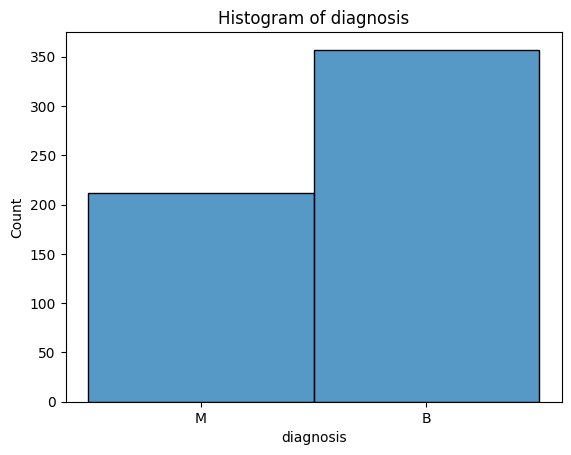

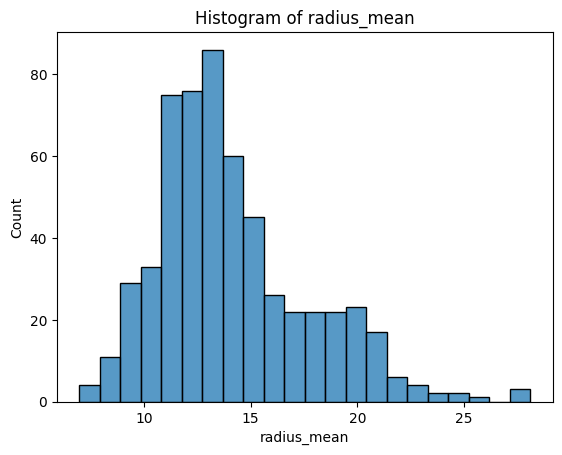

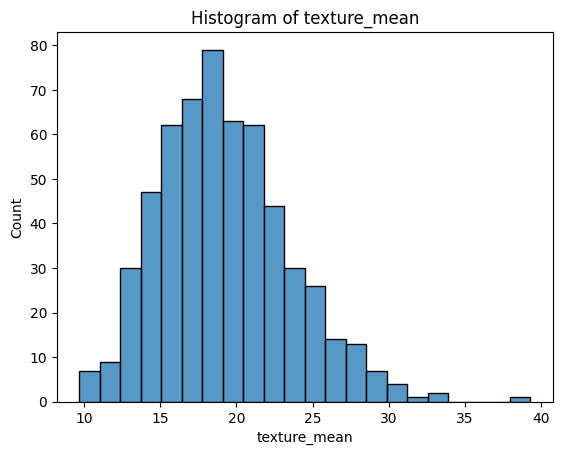

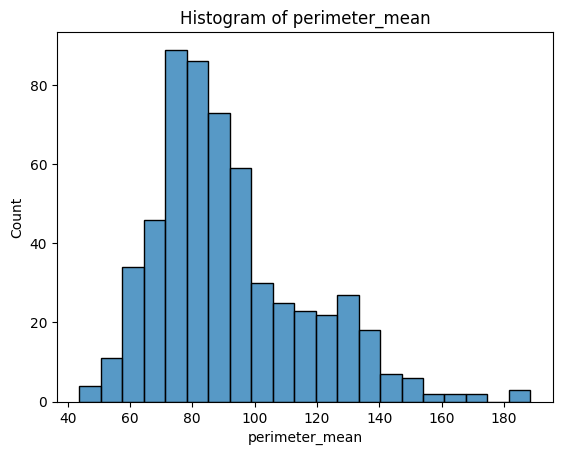

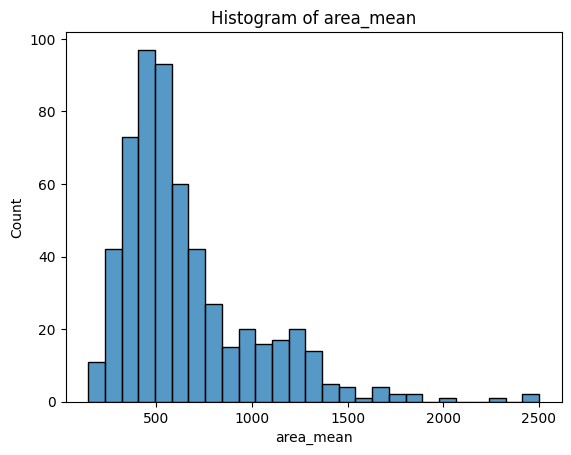

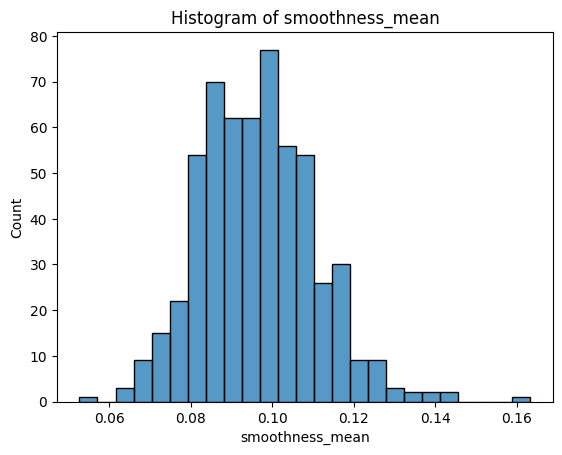

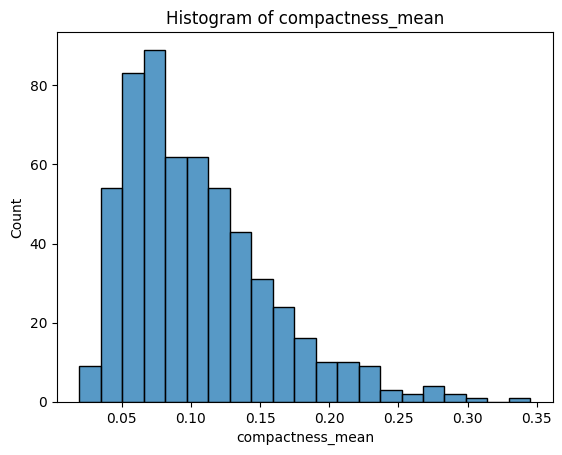

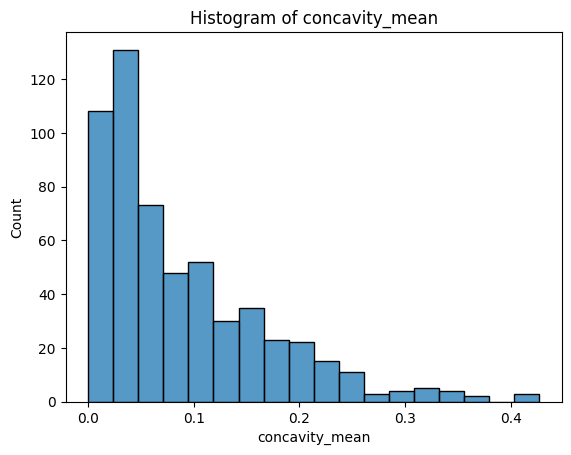

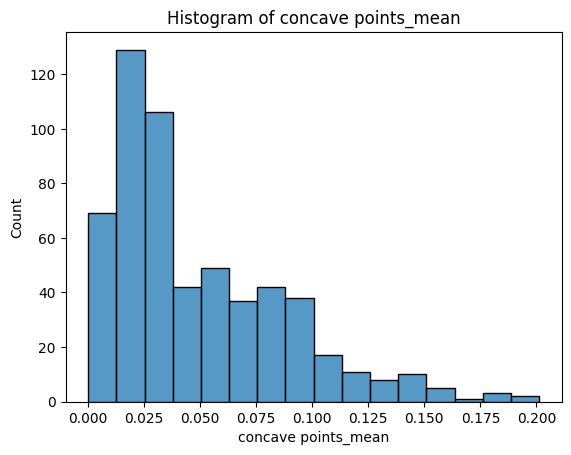

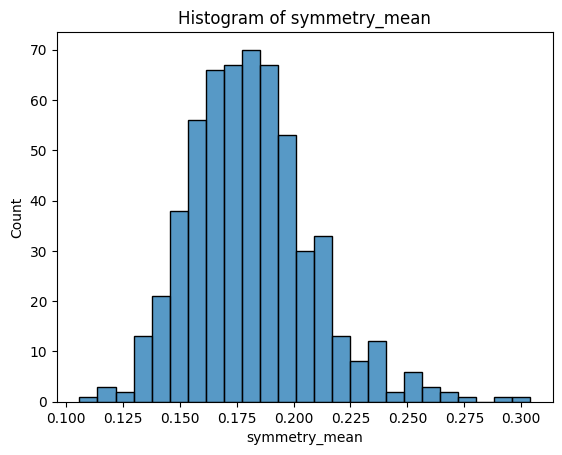

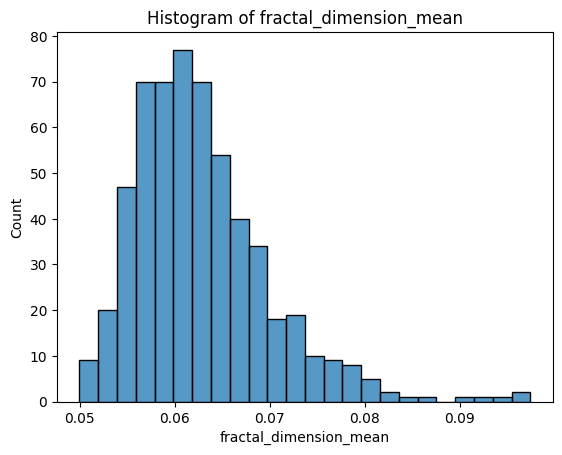

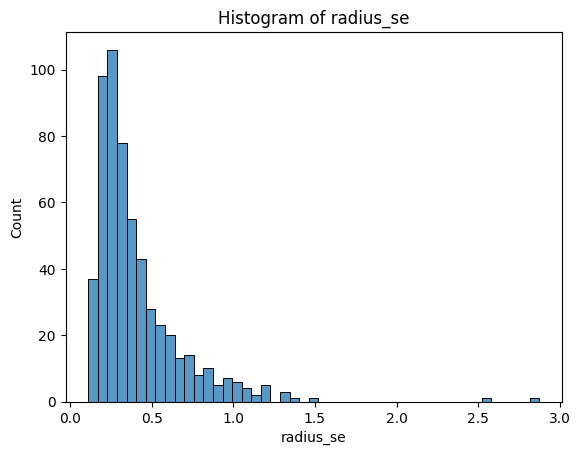

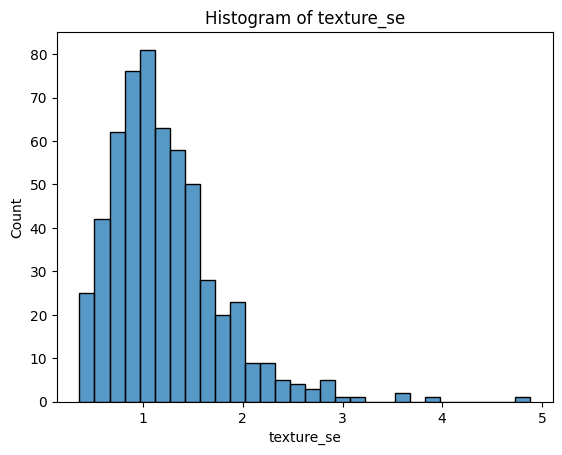

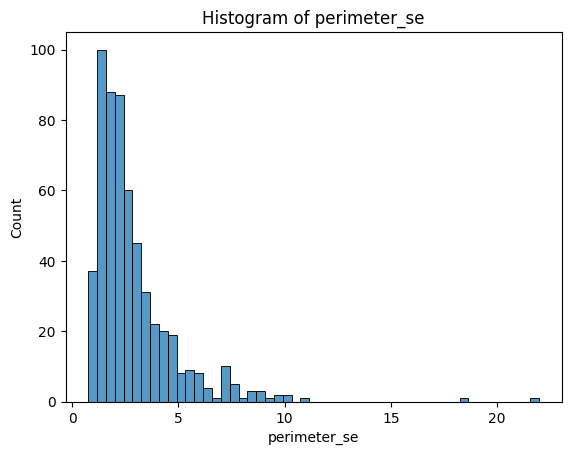

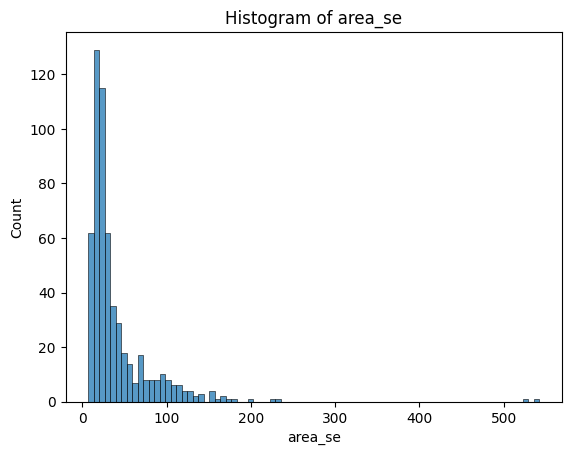

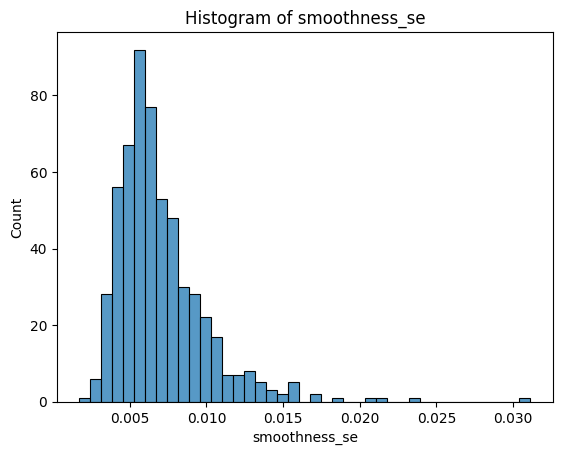

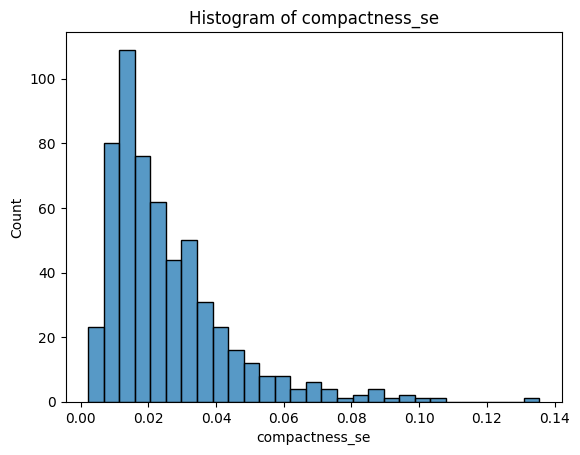

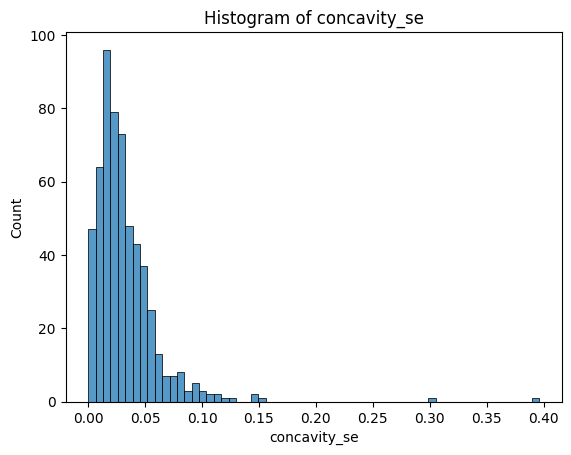

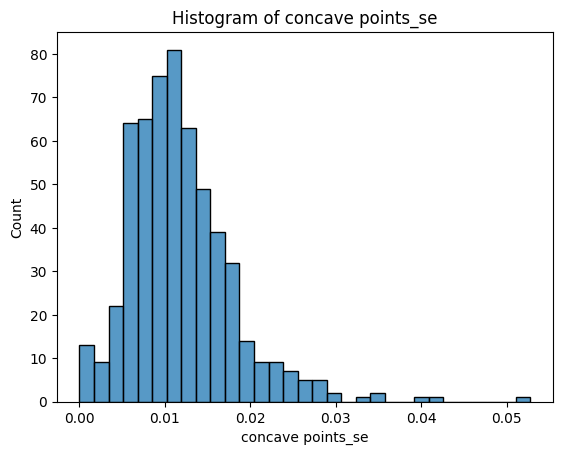

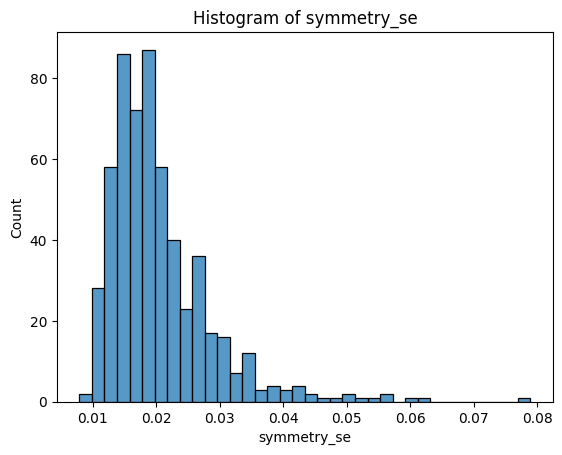

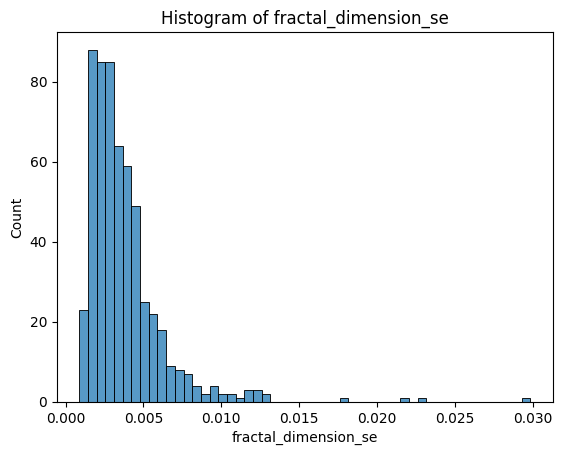

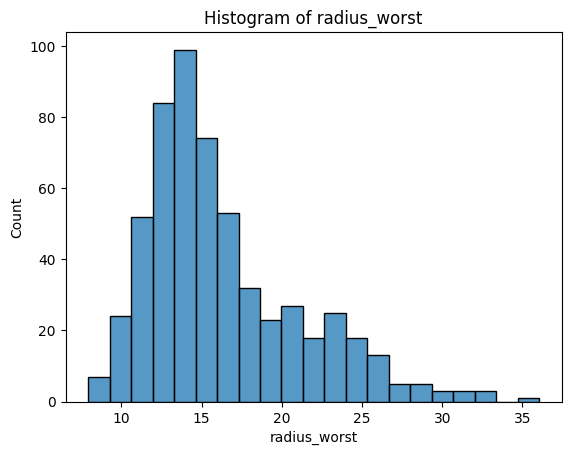

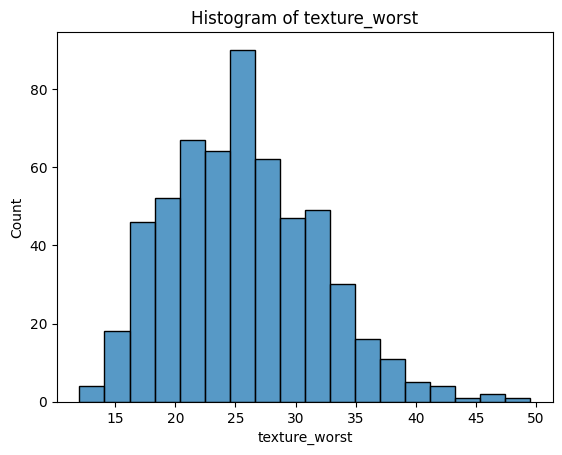

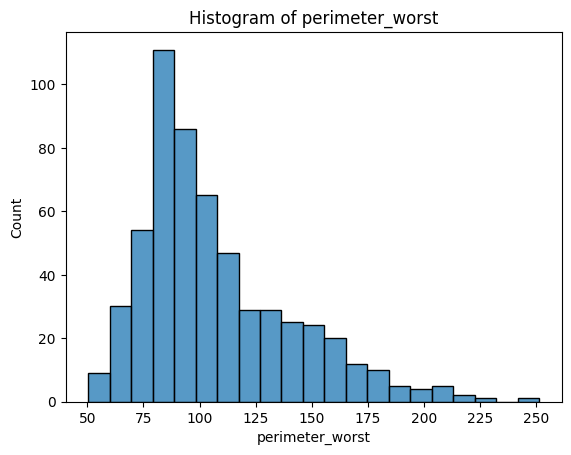

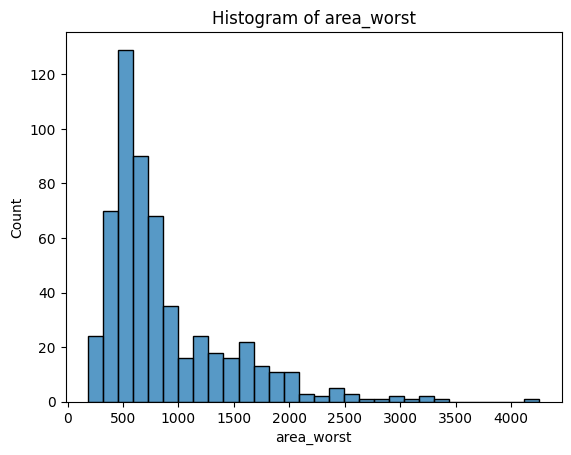

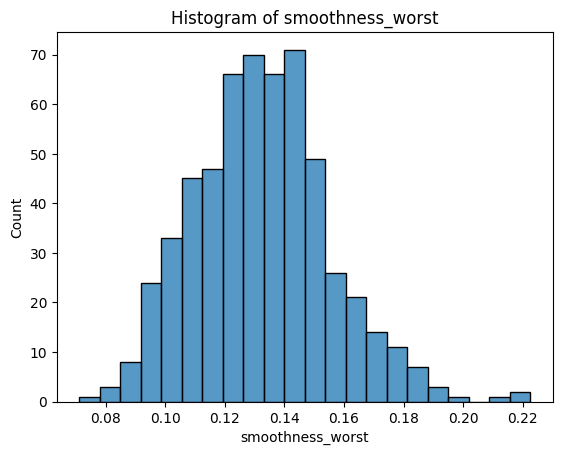

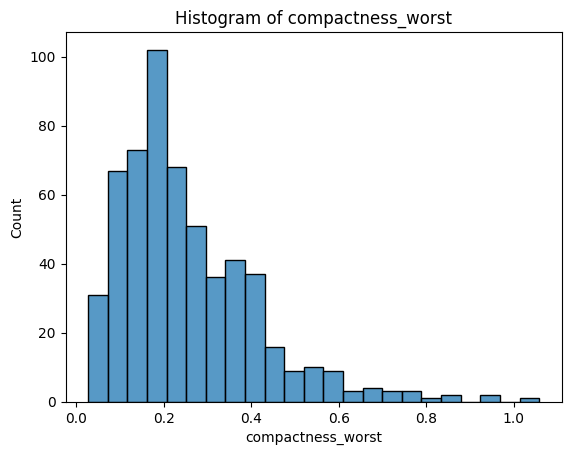

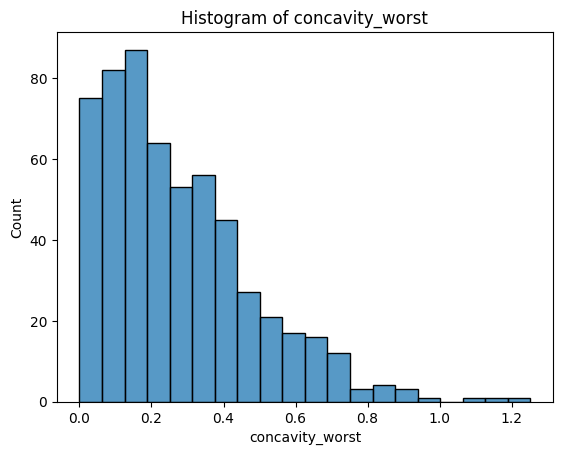

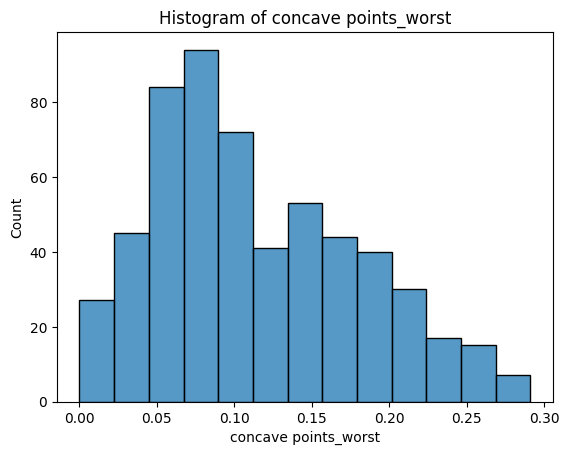

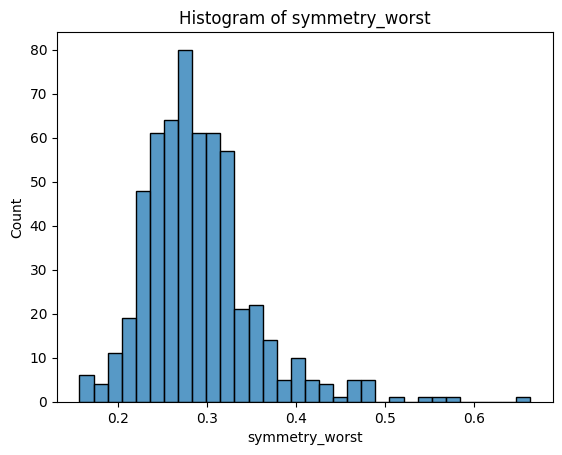

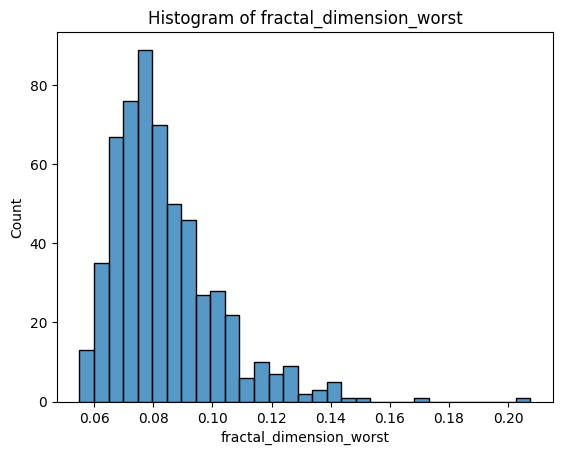

In [145]:
# Create histograms for each feature
for feature in cancer_data.columns:
    sb.histplot(cancer_data[feature])
    plt.title('Histogram of {}'.format(feature))
    plt.show()


### Removing Outliers

As we can see in the histograms above, there are a few outliers in our data. 
If we take a closer look at the following features:
- radius_se
- texture_se
- perimeter_se
- area_se
- smoothness_se
- concavity_se
- concave points_se
- symmetry_se
- fractal_dimension_se
- fractal_dimension_worst

We can find the most obvious outliers. Keep in mind that since we only have 570 results, which can be considered a low amount, as such, we can't remove too many outliers, because we would be removing too much data. So we are going to remove the most obvious outliers, and keep the ones that might be considered outliers, but are still relatively close to the rest of the data.

In [146]:
# Filter out the ones that have radius_se bigger than 2.5
cancer_data = cancer_data[cancer_data['radius_se'] < 2.5]

# Filter out the ones that have texture_se bigger than 4
cancer_data = cancer_data[cancer_data['texture_se'] < 4]

# Filter out the ones that have perimeter_se bigger than 17
cancer_data = cancer_data[cancer_data['perimeter_se'] < 17]

# Filter out the ones that have area_se bigger than 400
cancer_data = cancer_data[cancer_data['area_se'] < 400]

# Filter out the ones that have smoothness_se bigger than 0.03
cancer_data = cancer_data[cancer_data['smoothness_se'] < 0.03]

# Filter out the ones that have concavity_se bigger than 0.25
cancer_data = cancer_data[cancer_data['concavity_se'] < 0.25]

# Filter out the ones that have concave points_se bigger than 0.05
cancer_data = cancer_data[cancer_data['concave points_se'] < 0.05]

# Filter out the ones that have symmetry_se bigger than 0.07
cancer_data = cancer_data[cancer_data['symmetry_se'] < 0.07]

# Filter out the ones that have fractal_dimension_se bigger than 0.015
cancer_data = cancer_data[cancer_data['fractal_dimension_se'] < 0.015]

# Filter out the ones that have fractal_dimension_worst bigger than 0.2
cancer_data = cancer_data[cancer_data['fractal_dimension_worst'] < 0.2]


Let's check the data again, and see how our data looks like now.

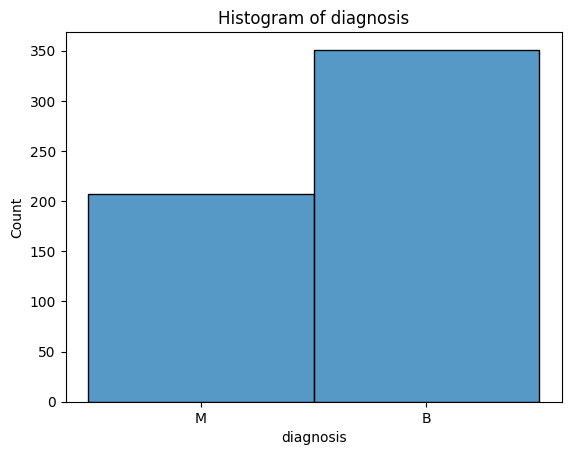

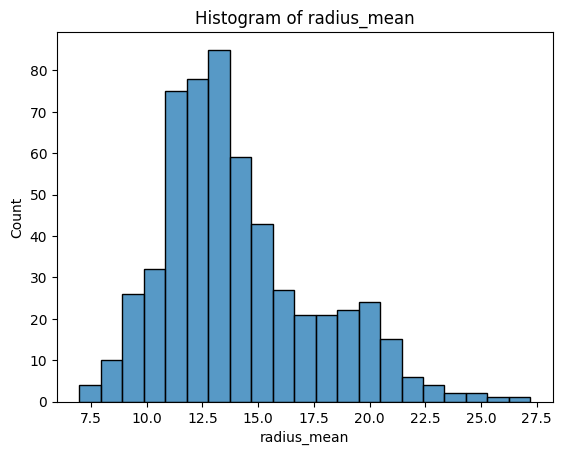

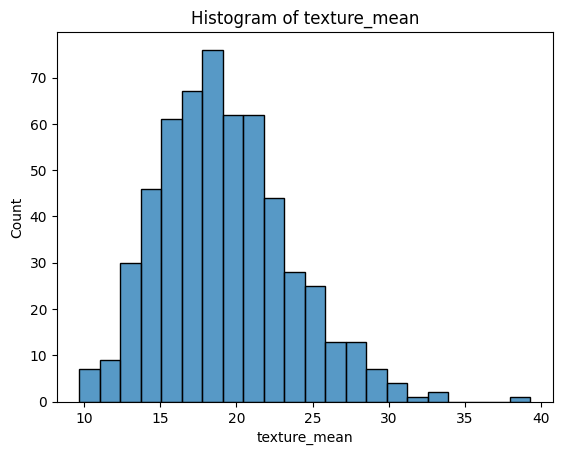

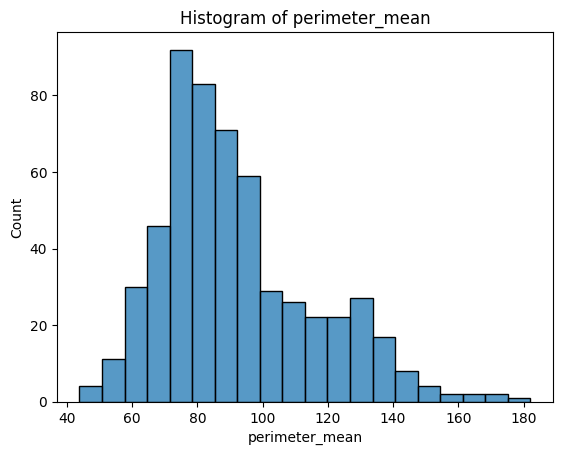

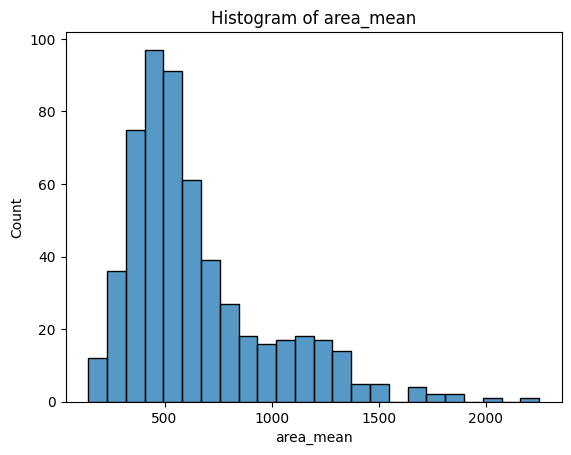

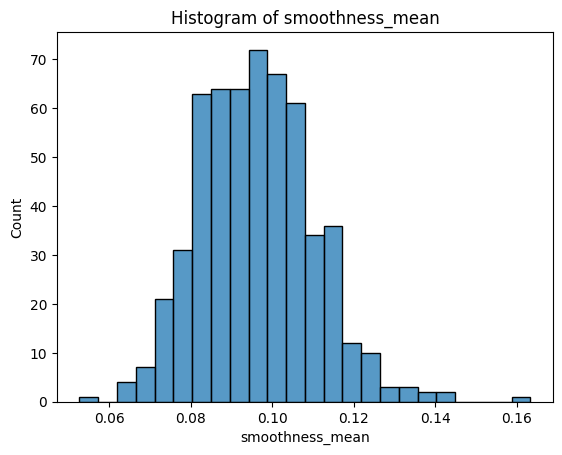

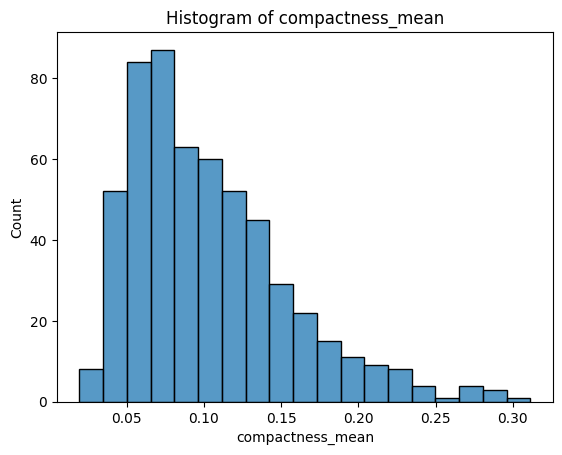

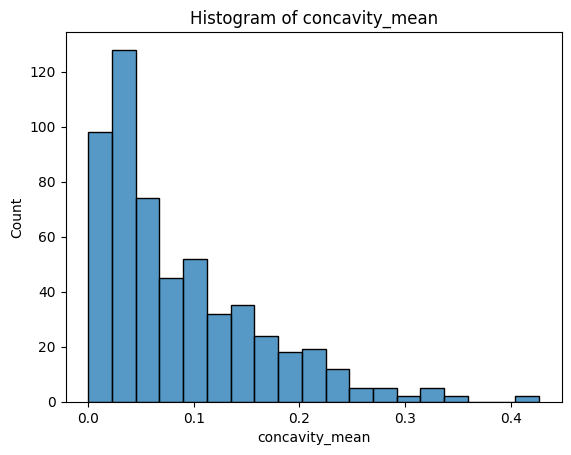

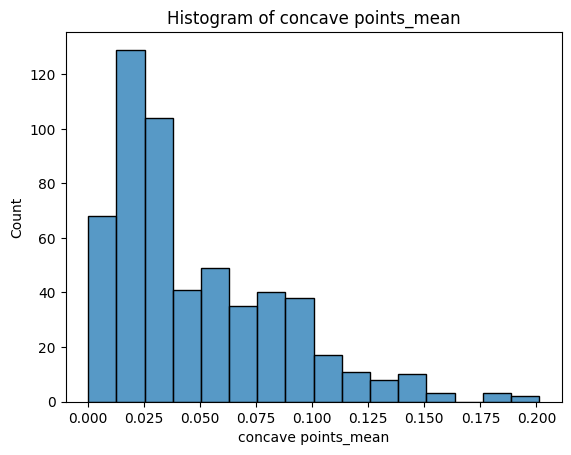

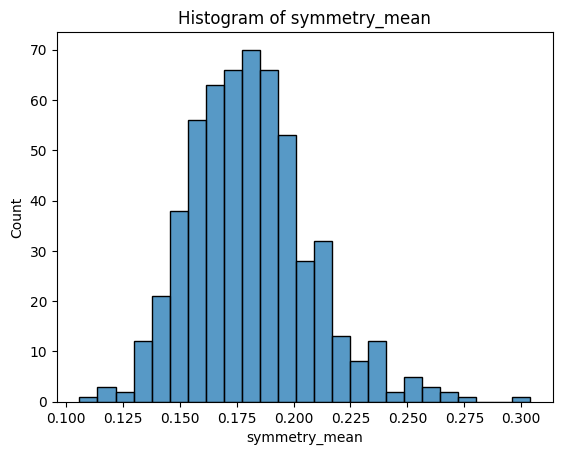

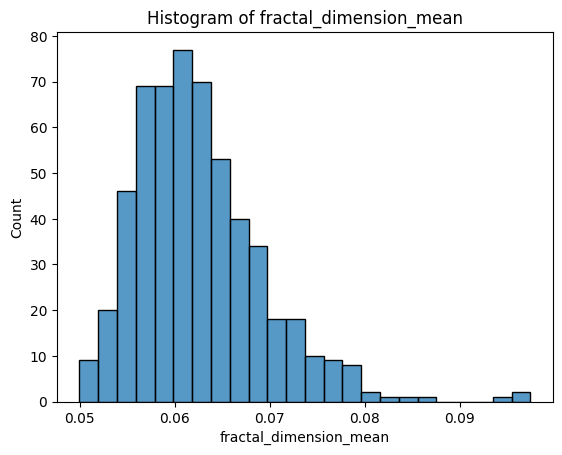

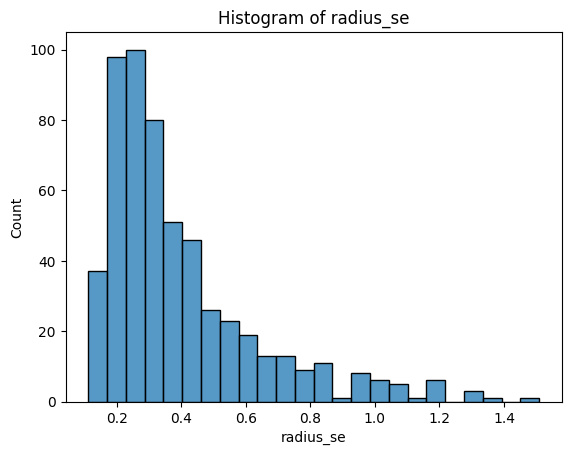

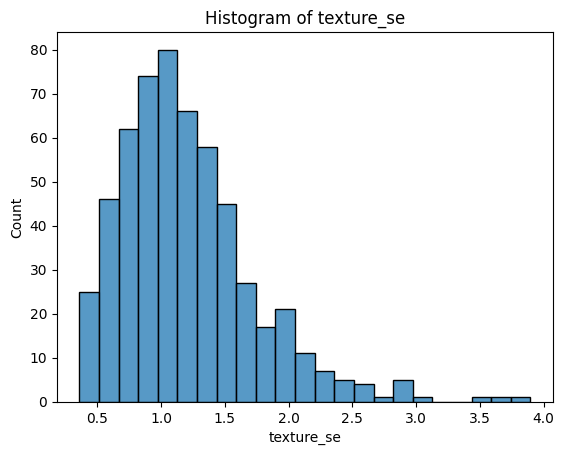

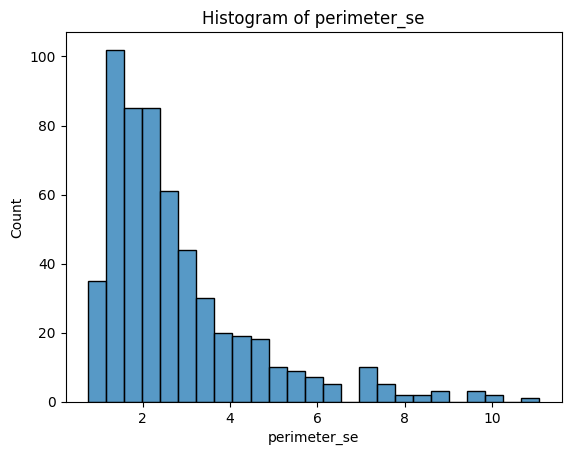

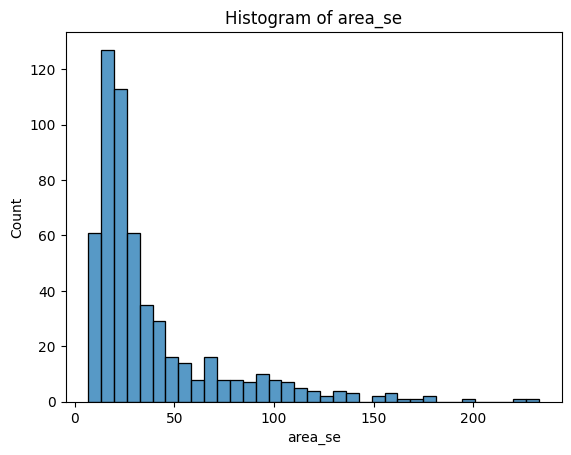

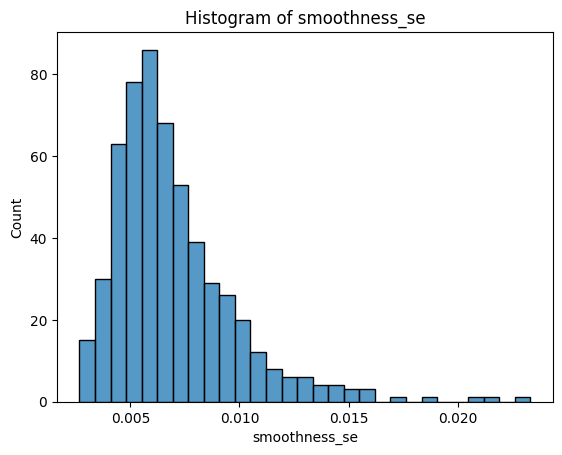

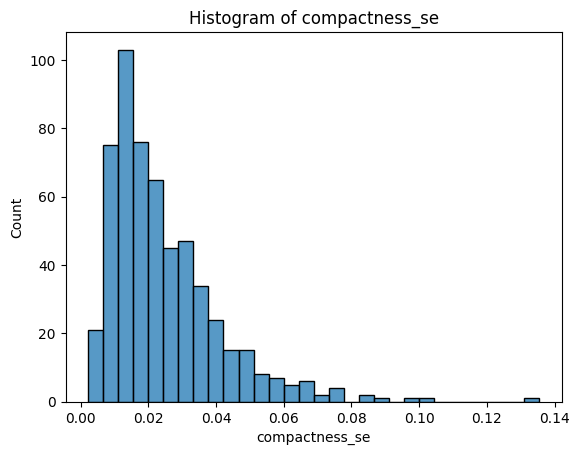

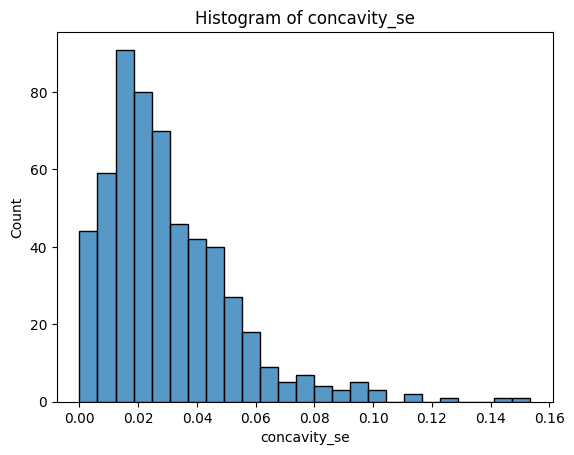

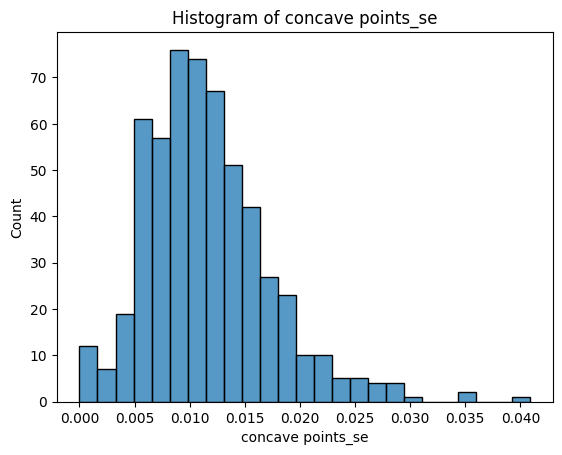

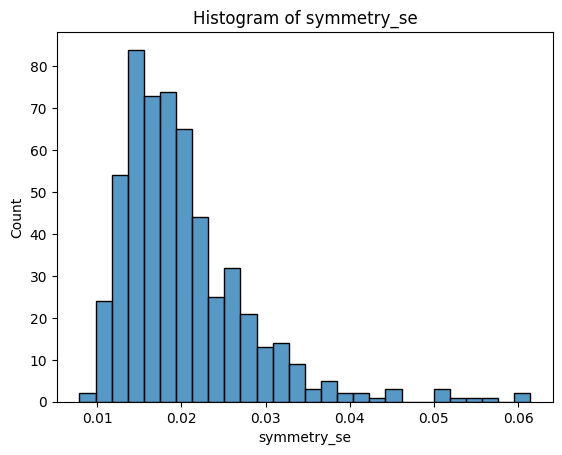

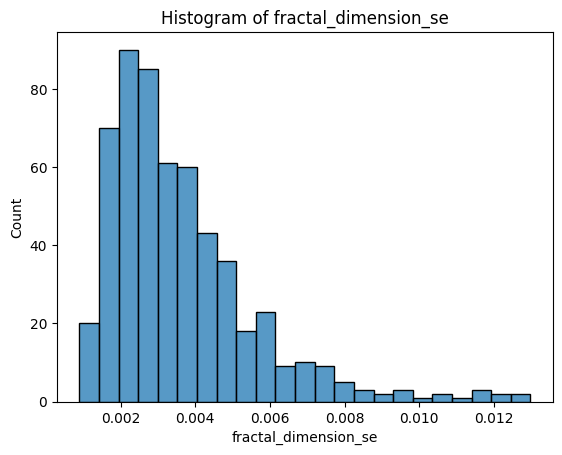

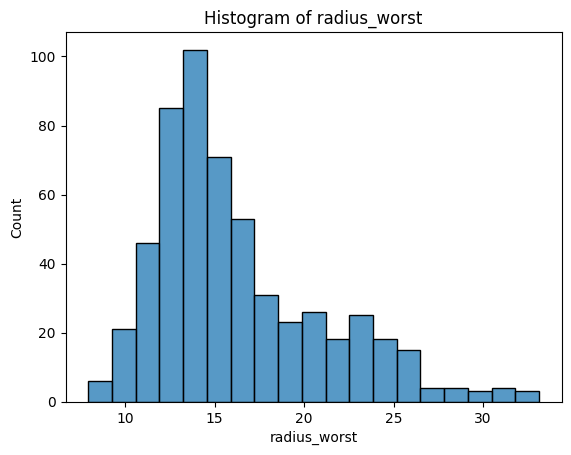

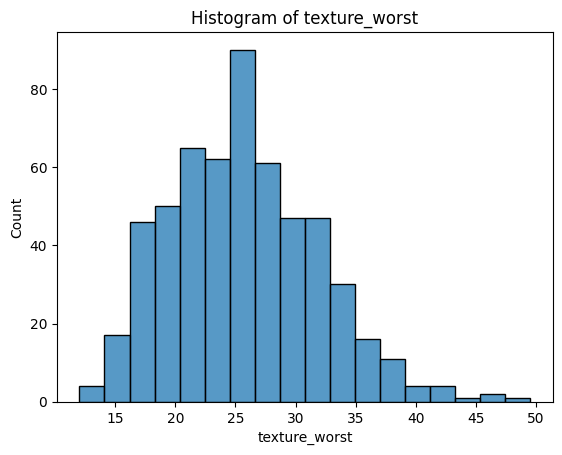

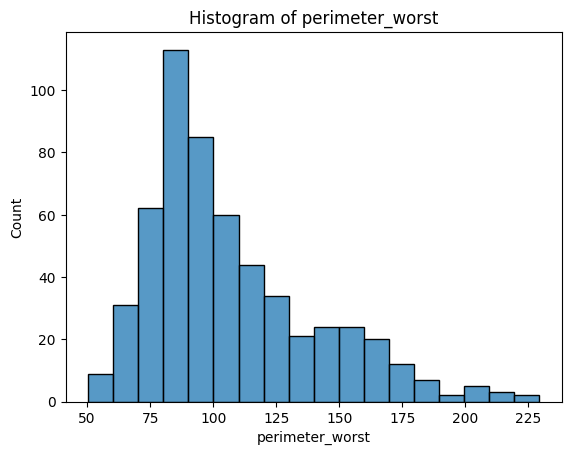

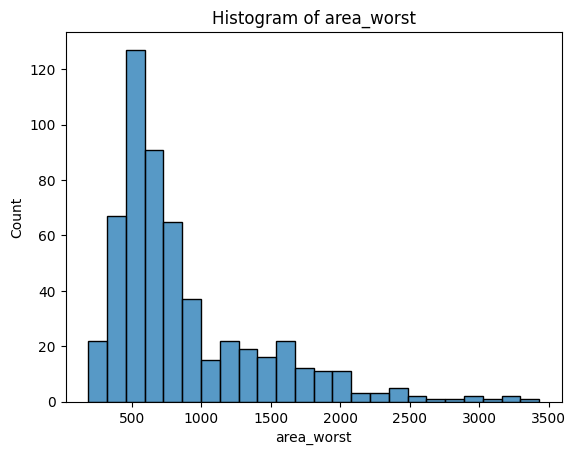

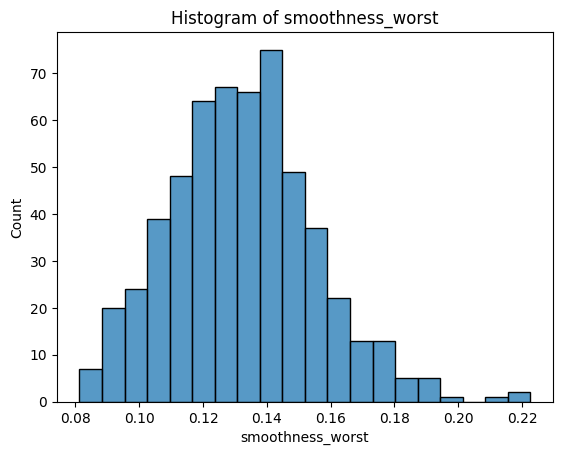

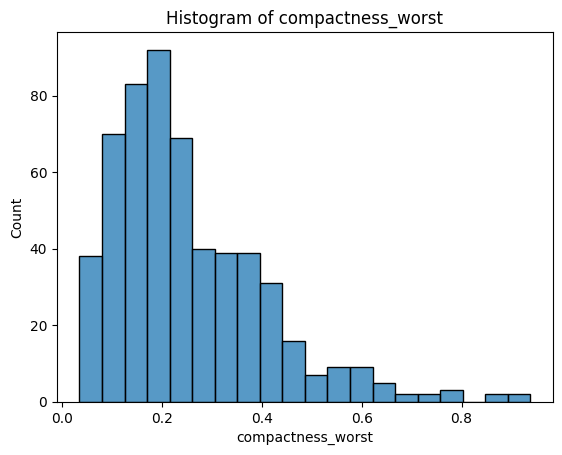

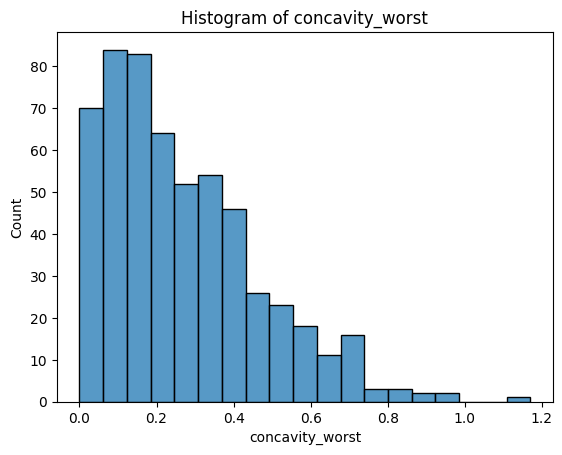

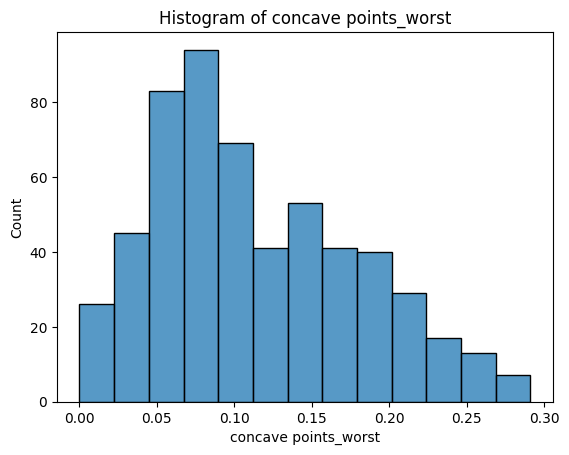

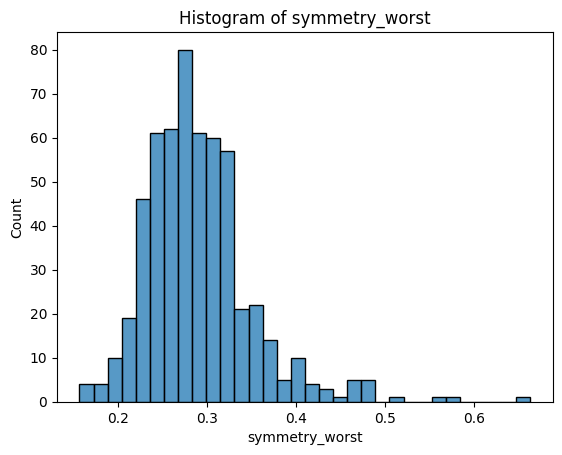

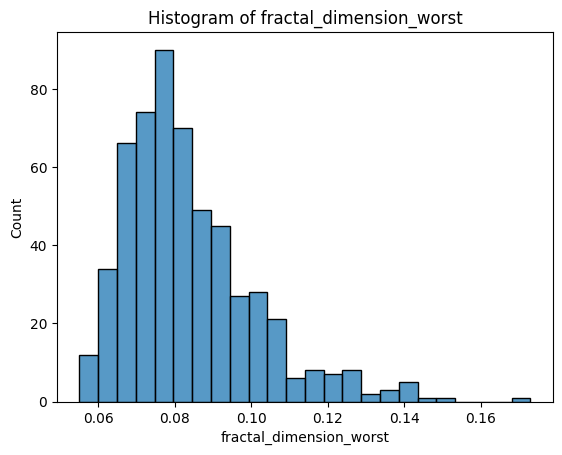

In [147]:
# Create histograms for each feature
for feature in cancer_data.columns:
    sb.histplot(cancer_data[feature])
    plt.title('Histogram of {}'.format(feature))
    plt.show()

As we can see, our data is much better. There might some cases, where it can be debatable if it is an outlier or not, but the most obvious cases are gone.

Let's see how many rows we have now.

In [148]:
cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,14.106016,19.272724,91.774355,650.406452,0.096224,0.103128,0.086014,0.048281,0.180871,0.062575,0.394301,1.202205,2.790062,38.469333,0.006947,0.024575,0.029923,0.011535,0.020224,0.003616,16.251663,25.689731,107.110143,875.434588,0.132429,0.252185,0.266901,0.114025,0.290044,0.083582
std,3.421632,4.306507,23.554568,334.545731,0.014008,0.051508,0.075832,0.038138,0.026932,0.006708,0.240460,0.527149,1.728456,34.864889,0.002777,0.016365,0.022058,0.005635,0.007677,0.002000,4.739433,6.128480,32.861617,549.216899,0.022687,0.153643,0.199795,0.065323,0.060192,0.017141
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.002667,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,11.710000,16.170000,75.262500,420.625000,0.086012,0.063945,0.029240,0.020280,0.161900,0.057693,0.231575,0.828900,1.597000,17.820000,0.005139,0.012927,0.014860,0.007621,0.015013,0.002229,13.050000,21.120000,84.367500,516.025000,0.116600,0.145775,0.112975,0.064330,0.250700,0.071462
50%,13.375000,18.855000,86.290000,551.400000,0.095720,0.091705,0.059640,0.033245,0.179200,0.061475,0.318850,1.088000,2.280000,24.300000,0.006302,0.020155,0.025350,0.010825,0.018700,0.003119,14.965000,25.445000,97.665000,685.550000,0.131400,0.211650,0.225450,0.098595,0.282450,0.079960
75%,15.772500,21.765000,103.775000,782.200000,0.105050,0.129675,0.122400,0.072710,0.195400,0.066007,0.472250,1.464250,3.296500,44.715000,0.008079,0.031790,0.040140,0.014587,0.023045,0.004443,18.782500,29.705000,125.325000,1080.500000,0.146000,0.336450,0.379550,0.161300,0.317825,0.091865
max,27.220000,39.280000,182.100000,2250.000000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,1.509000,3.896000,11.070000,233.000000,0.023330,0.135400,0.153500,0.040900,0.061460,0.012980,33.130000,49.540000,229.300000,3432.000000,0.222600,0.937900,1.170000,0.291000,0.663800,0.173000


We still have 558 results, which is still a good amount of data to work with.

### Removing Correlated Features

Now, we have to deal with another problem. Some of our features have names like area, radius and perimeter. This indicates that they might be related to each other. In order to solve this problem, we are going to use a Correlation Matrix, and remove the features that are highly correlated with each other.

<Axes: >

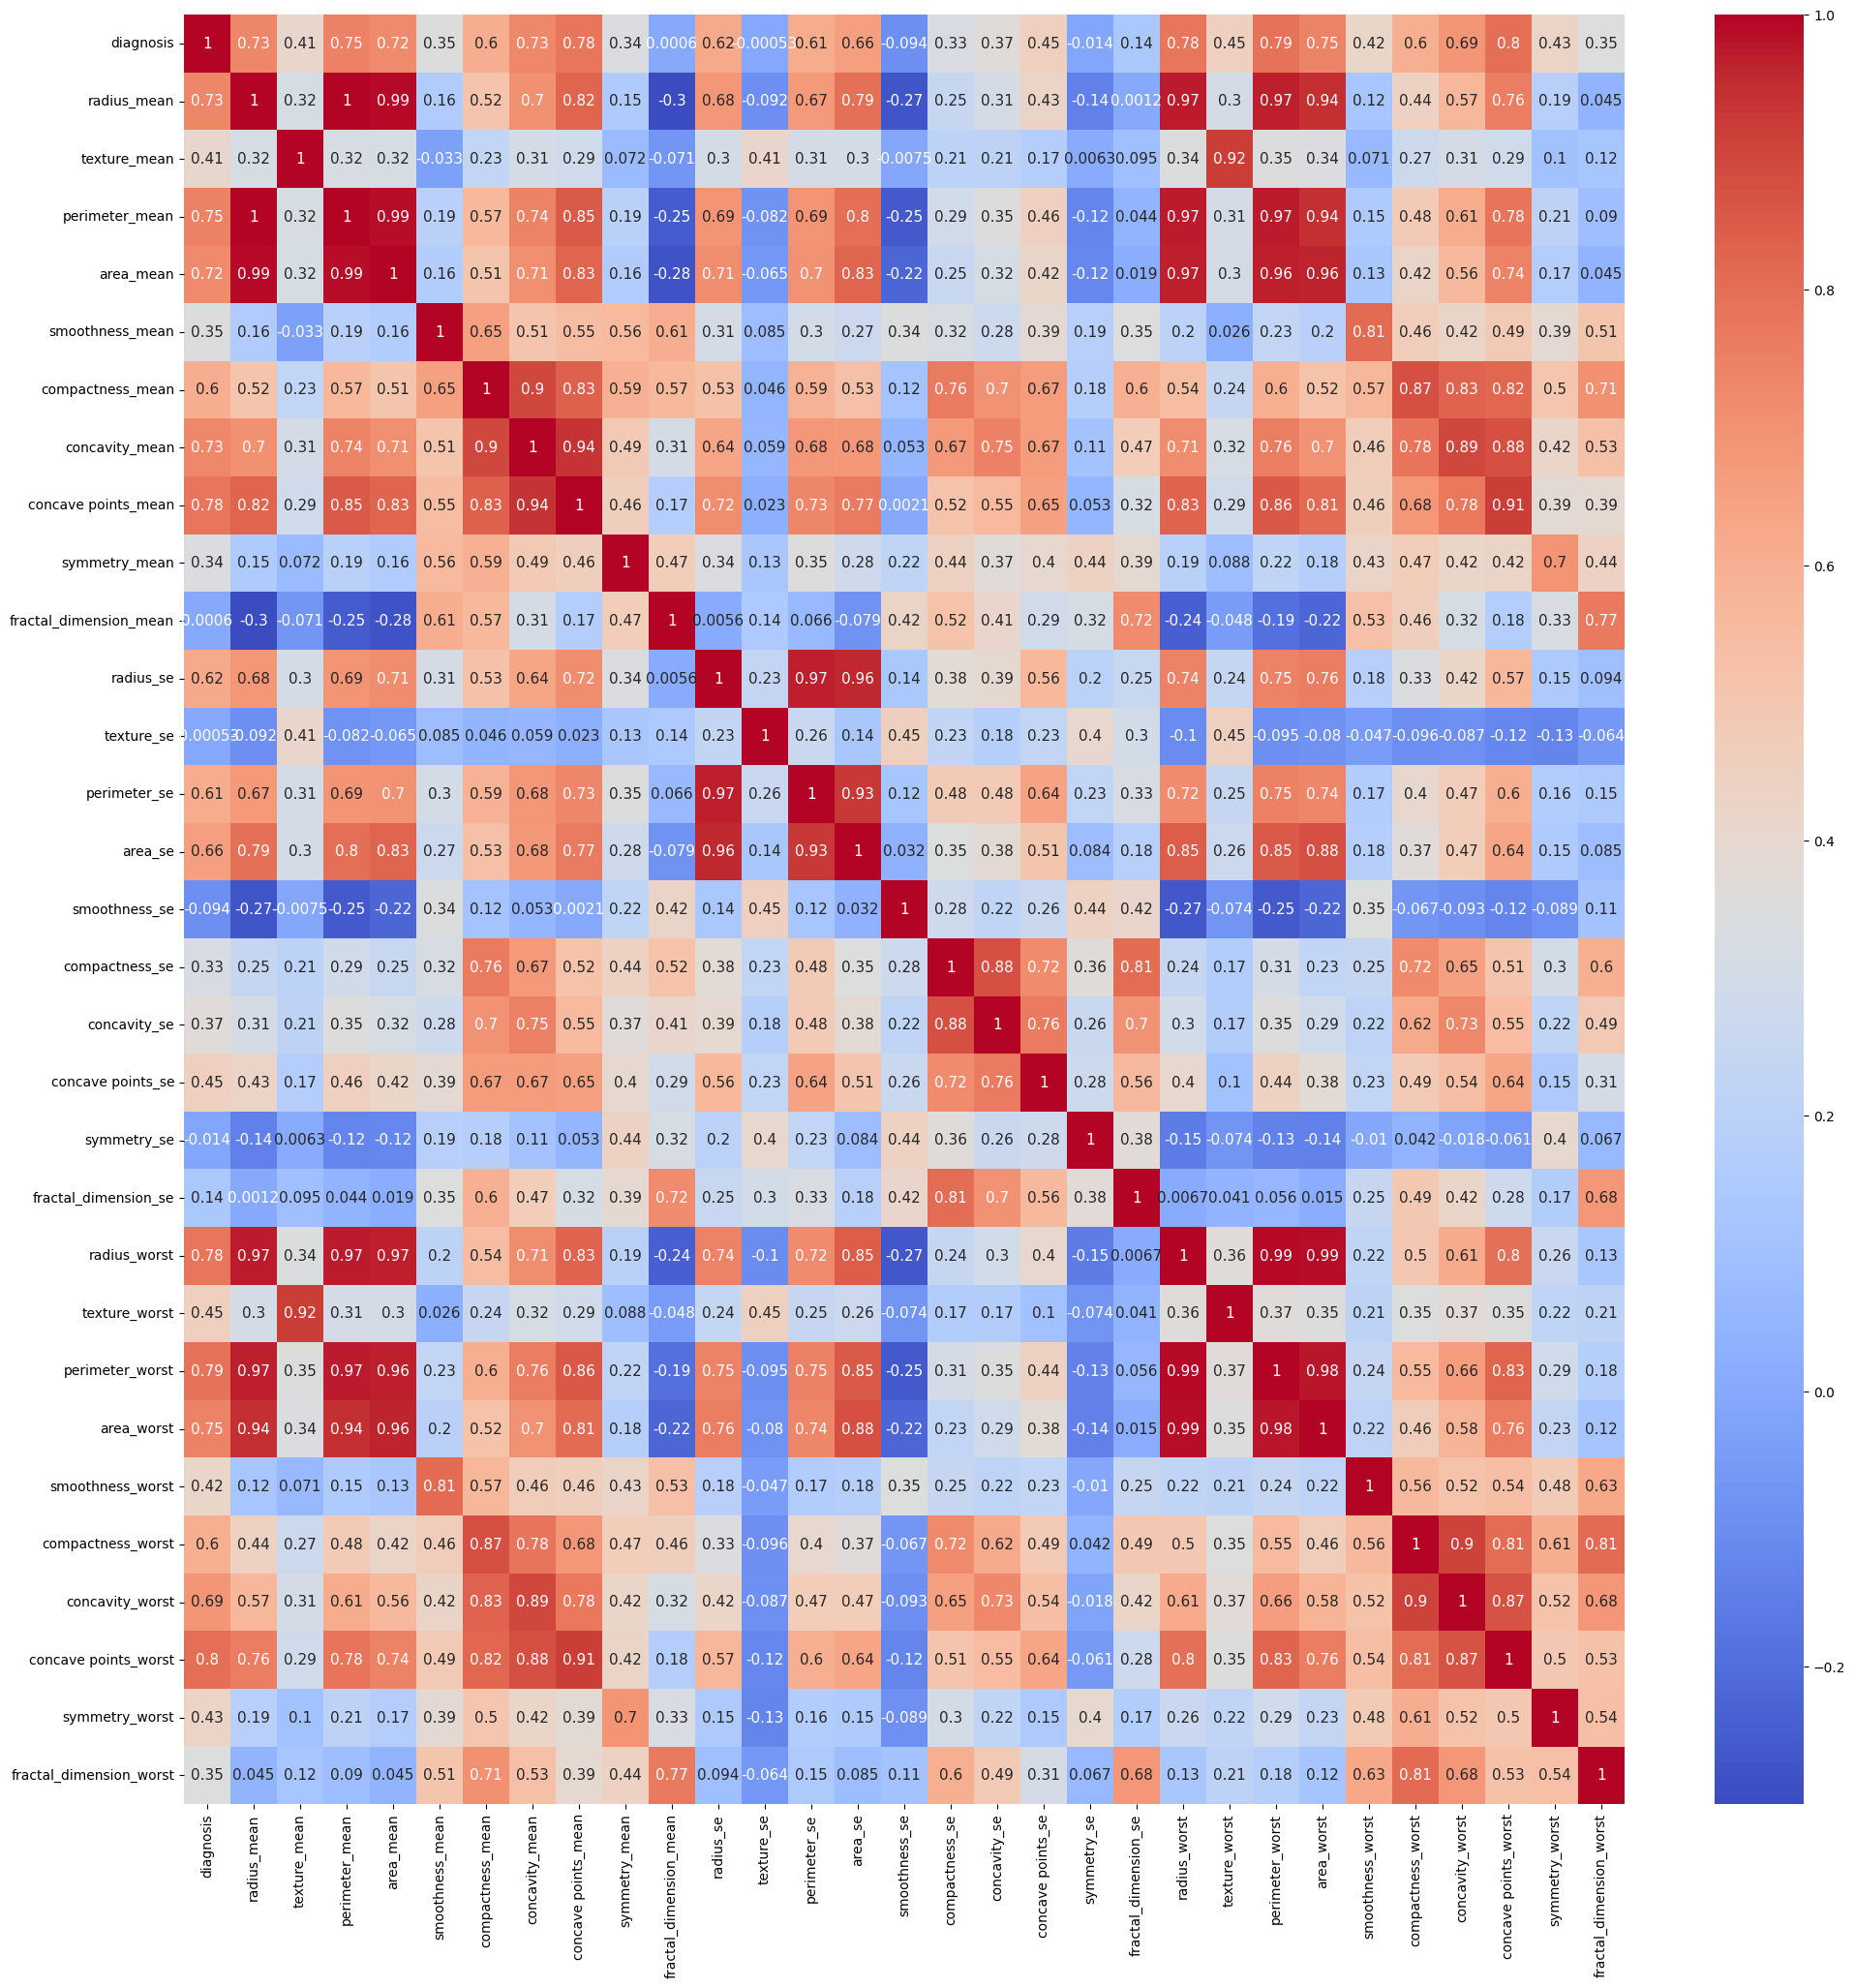

In [149]:
# Convert the diagnosis column to 0 and 1 in order to use the correlation matrix
cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M': 1, 'B': 0})

# Create a correlation matrix
corr_matrix = cancer_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(24, 24))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 11})


As we can see in the correlation matrix above, there are some features that have a high correlation between them.
In particular, the ones we already suspected, which are area, radius, perimeter. Other features, like concave points, compactness and concavity are also highly correlated with each other. 

We will leave the radius and compactness features for now and check the results later.

In [150]:
# Remove the perimeter_mean, area_mean
cancer_data.drop(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean'], axis=1, inplace=True)

# Remove the perimeter_worst, area_worst
cancer_data.drop(['perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst'], axis=1, inplace=True)

# Remove the perimeter_se, area_se
cancer_data.drop(['perimeter_se', 'area_se', 'concavity_se', 'concave points_se'], axis=1, inplace=True)



Now that we have removed some of the correlated features, let's check our data again.

<Axes: >

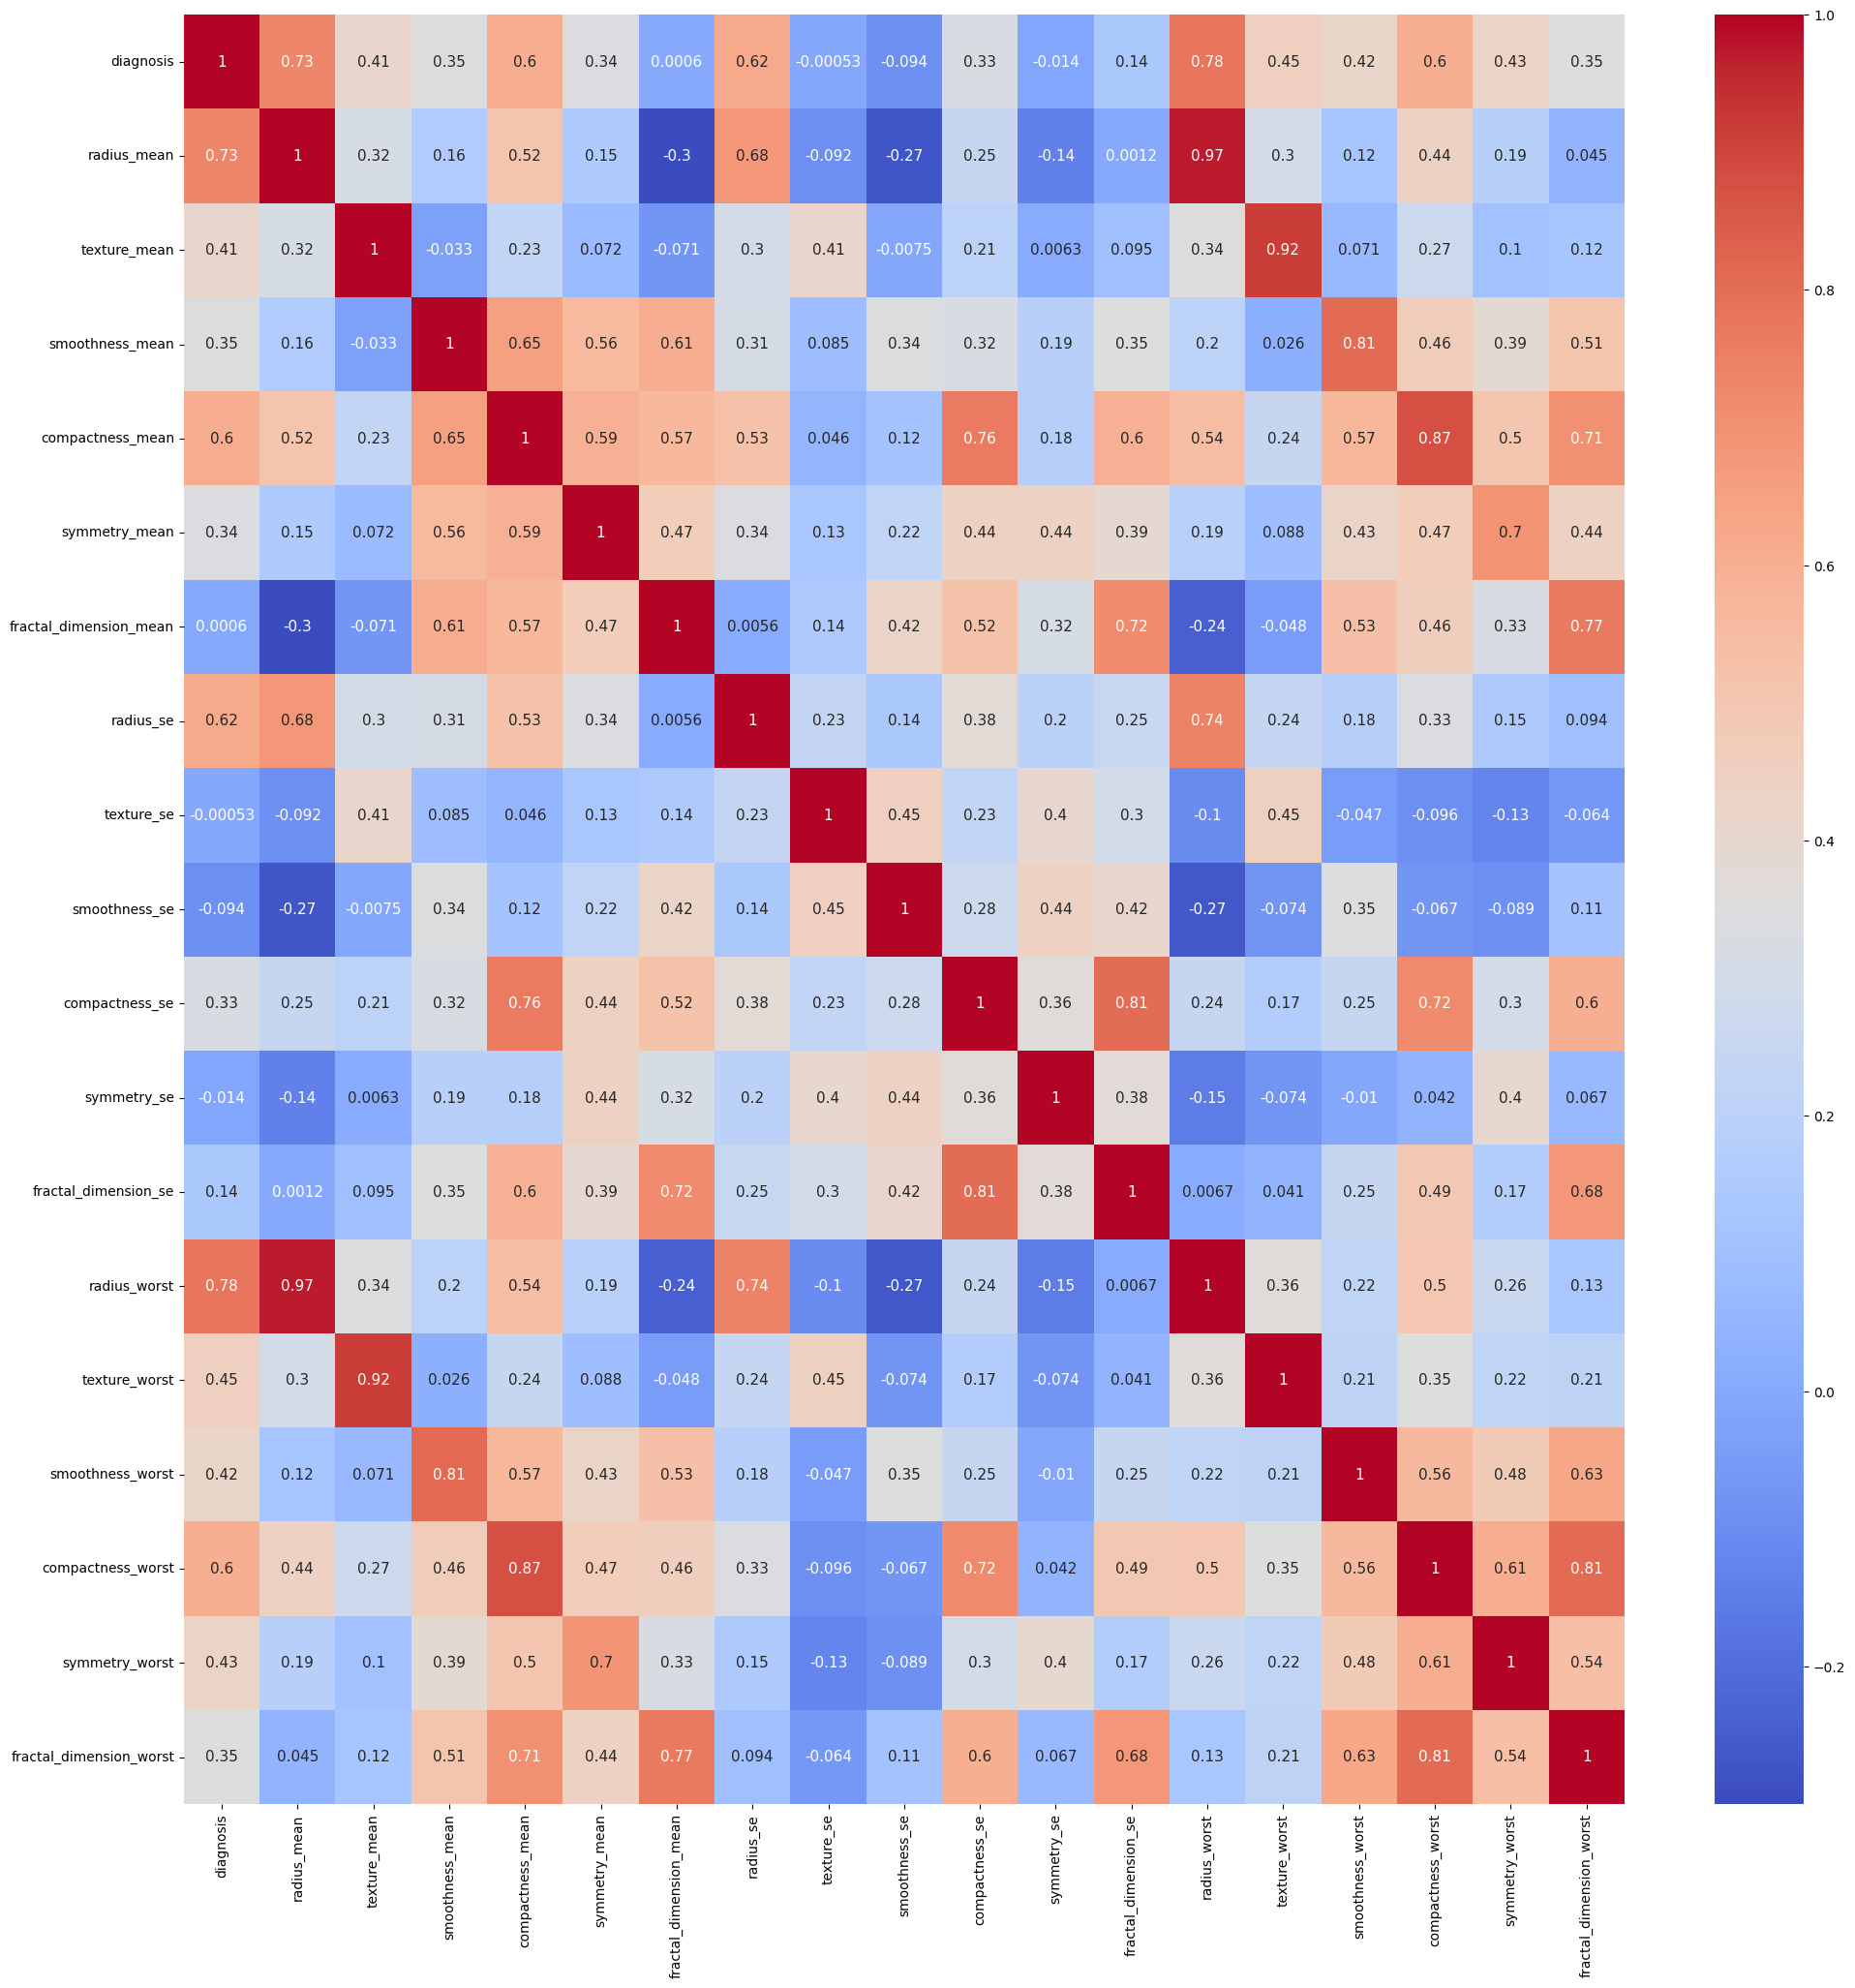

In [151]:
# Create a correlation matrix
corr_matrix = cancer_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(24, 24))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 11})

It's definitely much better than before, however, we still have some aspects that we can improve on.
If we take a look at the correlation matrix, we can see that the radius_mean and radius_worts are still highly correlated with each other. 
The same happens with compactness_mean and compactness_worst as well as texture_mean and texture_worst.

Let's remove these features and check our data again.

In [152]:
# Remove radius_worst, texture_worst, compactness_worst
cancer_data.drop(['radius_worst', 'texture_worst', 'compactness_worst'], axis=1, inplace=True)

<Axes: >

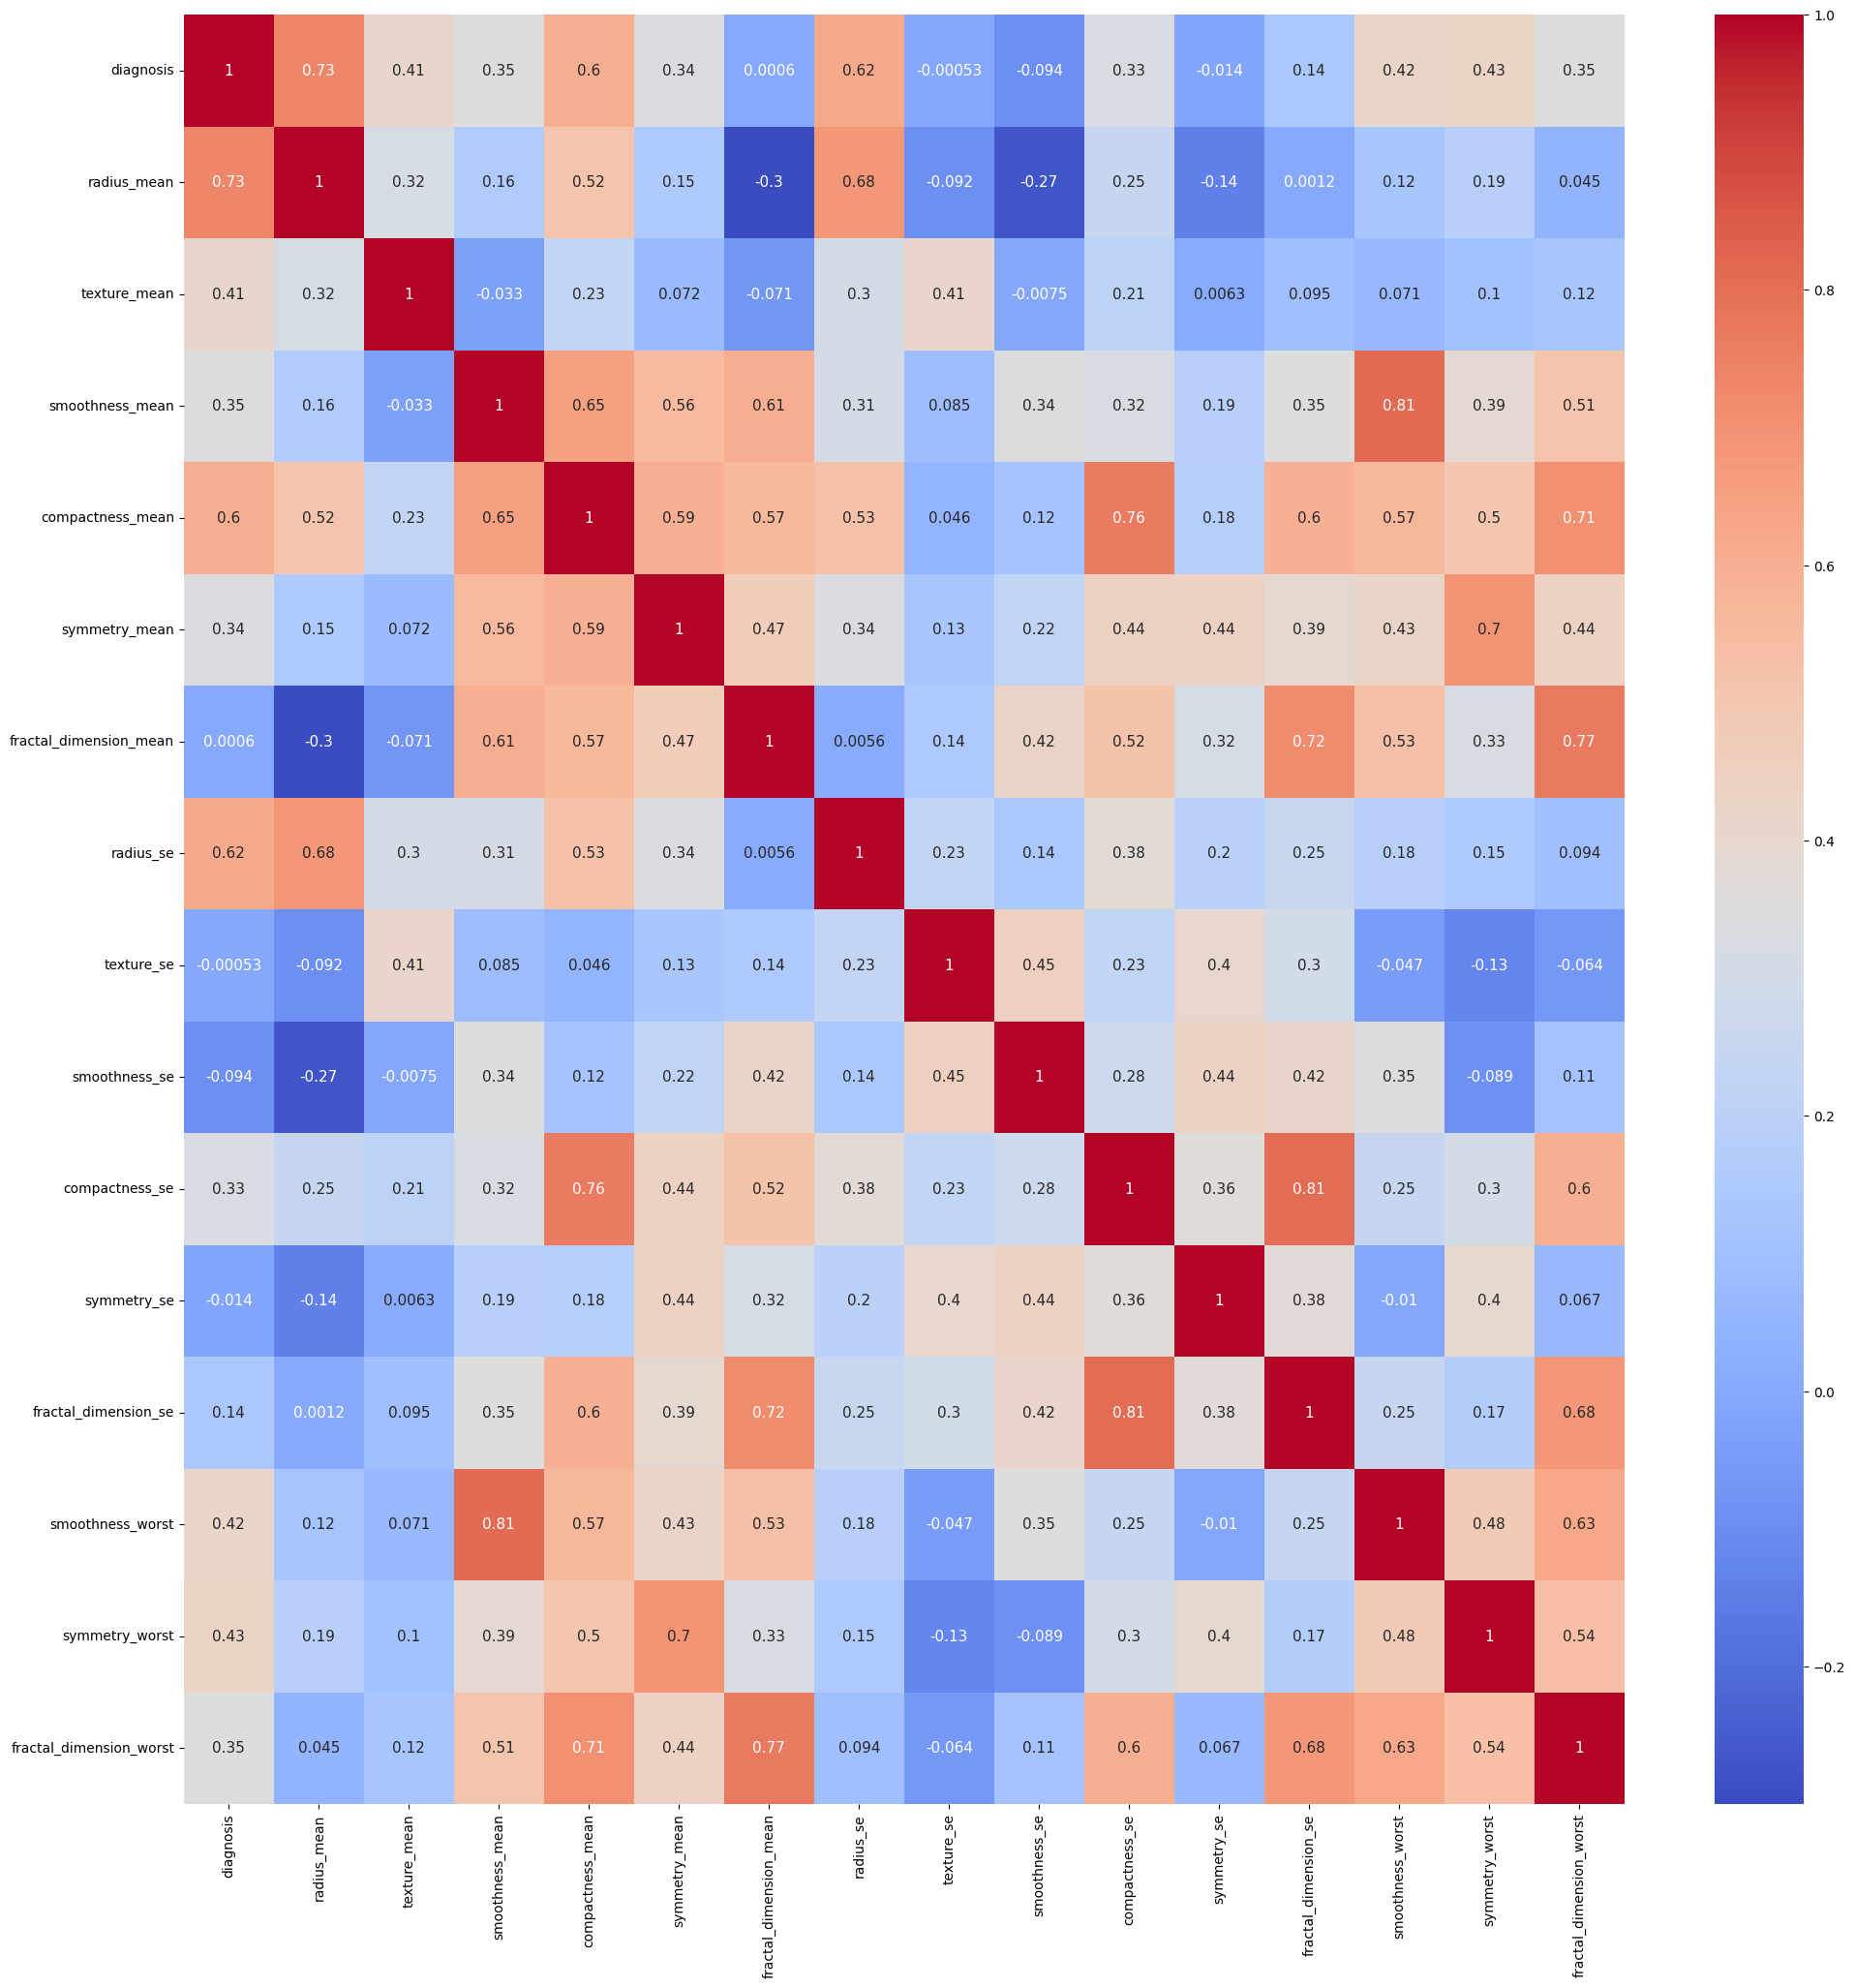

In [153]:
# Create a correlation matrix
corr_matrix = cancer_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(24, 24))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 11})

Much better! Now, no feature correlation is above 0.9, and we can proceed to the next step.
Let's just convert our target concept back to M and B, instead of 1 and 0.

In [156]:
# Convert the diagnosis column back to M and B
cancer_data['diagnosis'] = cancer_data['diagnosis'].map({1: 'M', 0: 'B'})

cancer_data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193,0.1622,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532,0.1238,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571,0.1444,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208,0.2098,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115,0.1374,0.2364,0.07678


Let's save our data to a csv file:

In [157]:
# Save data to a new CSV file
cancer_data.to_csv('Cancer_Data_Cleaned.csv', index=False)

### Data Balancing

Now that we have eliminated the outliers and the highly correlated features of our set, let's start to handle the balancing of our data.

Let's plot the number of benign and malignant cells in our data set:

<Axes: xlabel='diagnosis', ylabel='Count'>

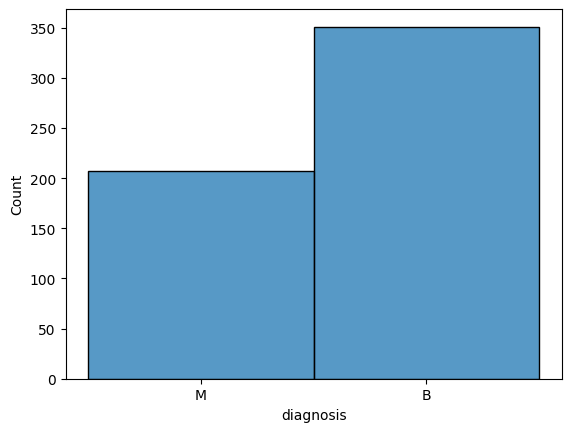

In [158]:
# Read the data from the CSV file
cancer_data = pd.read_csv('Cancer_Data_Cleaned.csv')

sb.histplot(cancer_data['diagnosis'])

As we can see, there are more benign cells than malignant cells. This is a problem because our model will be biased towards benign cells. In order to solve this problem, we can either add more malignant cells to our data set (oversampling) or remove some benign cells (undersampling).

We are going to try both methods and see which one gives us better results.

The number of classes before fit: 558
The number of classes after fit of oversampler: 702
The number of classes after fit of undersampler: 414


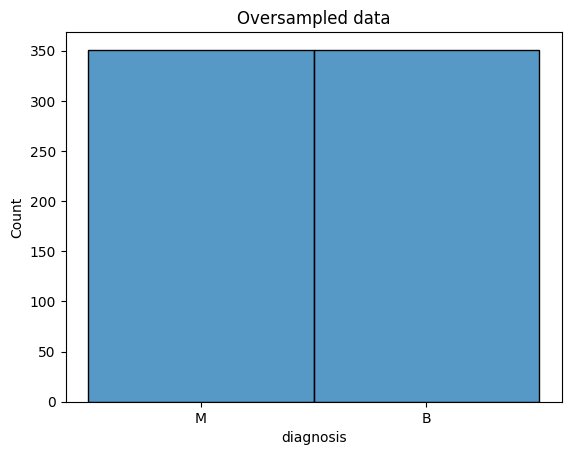

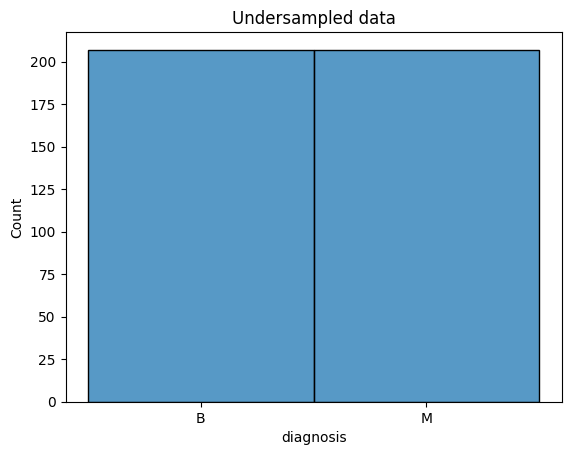

In [92]:
# All the features except the diagnosis are the inputs
all_inputs = cancer_data.drop('diagnosis', axis=1)
all_labels = cancer_data['diagnosis']

print('The number of classes before fit: {}'.format(len(all_labels)))

# Oversampling
ros = RandomOverSampler()
all_inputs_os, all_labels_os = ros.fit_resample(all_inputs, all_labels)

# Undersampling
rus = RandomUnderSampler()
all_inputs_us, all_labels_us = rus.fit_resample(all_inputs, all_labels)

print('The number of classes after fit of oversampler: {}'.format(len(all_labels_os)))
print('The number of classes after fit of undersampler: {}'.format(len(all_labels_us)))

sb.histplot(all_labels_os)
plt.title('Oversampled data')
plt.show()

sb.histplot(all_labels_us)
plt.title('Undersampled data')
plt.show()

Now we have a balanced dataset. 
As we can see in the graphics above, there are the same number of benign and malignant cells.

## Definition of the training and test sets

Now that we have a balanced dataset, we can split it into training and test sets. We are going to use 75% of the data for training and 25% for testing.

In [137]:
(train_inputs,
 test_inputs,
 train_labels,
 test_labels) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=0)

(train_inputs_os,
    test_inputs_os,
    train_labels_os,
    test_labels_os) = train_test_split(all_inputs_os, all_labels_os, test_size=0.25, random_state=0)

(train_inputs_us,
    test_inputs_us,
    train_labels_us,
    test_labels_us) = train_test_split(all_inputs_us, all_labels_us, test_size=0.25, random_state=0)

## Selection and parameterization of the learning algorithms to employ

It's time to finally start building our model.

Sometimes it can be hard to figure out the suited parameters for our model. In order to find the best parameters, we can use a grid search. This will try all the possible combinations of the parameters given and return the best one.

We are going to try different learning algorithms such as:

- Decision Tree
- K-Nearest Neighbors
- Support Vector Machine
- Neural Network

To each one of them, we need to figure out the best parameters to use.
And then we are going use the get the results of the best parameters for each algorithm.

In [128]:
def evaluate_model(model, parameters, train_inputs, train_labels, test_inputs, test_labels, title=""):
    # Create a StratifiedKFold object
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

    # Create a grid search object with the model and parameters
    grid_search = GridSearchCV(model, parameters, scoring='accuracy', cv=skf)

    # Fit the grid search
    grid_search.fit(train_inputs, train_labels)

    predictions = grid_search.predict(test_inputs)

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    print('Accuracy: {}'.format(accuracy_score(test_labels, predictions)*100))

    print(classification_report(test_labels, predictions))

    plt.show()
    sb.heatmap(confusion_matrix(test_labels, predictions), annot=True, fmt='d')
    plt.title('Confusion matrix of the {}'.format(title))

### Decision Tree

First, we are going to try a decision tree.

Best score: 0.9615895372233402
Best parameters: {'criterion': 'entropy', 'max_depth': 11}
Accuracy: 100.0
              precision    recall  f1-score   support

           B       1.00      1.00      1.00        94
           M       1.00      1.00      1.00        46

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Best score: 0.9300232288037165
Best parameters: {'criterion': 'gini', 'max_depth': 13}
Accuracy: 97.14285714285714
              precision    recall  f1-score   support

           B       1.00      0.96      0.98        94
           M       0.92      1.00      0.96        46

    accuracy                           0.97       140
   macro avg       0.96      0.98      0.97       140
weighted avg       0.97      0.97      0.97       140



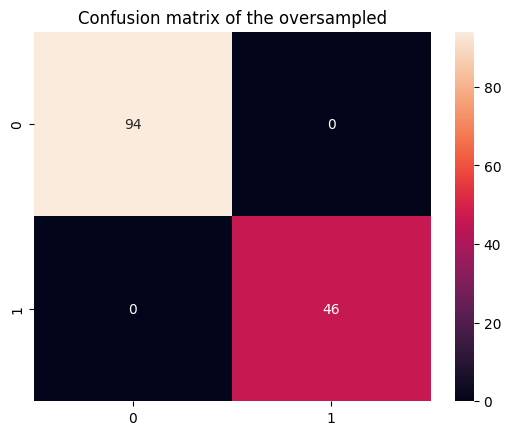

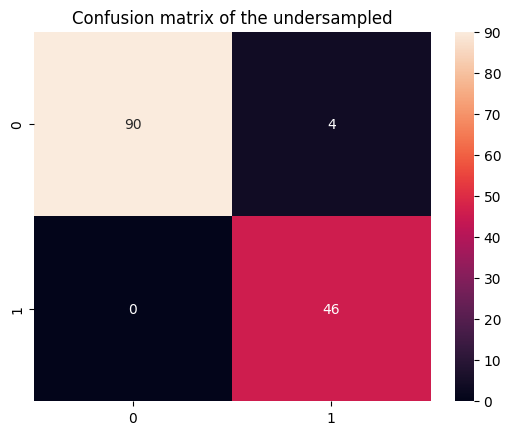

In [139]:
parameters_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
}

evaluate_model(DecisionTreeClassifier(), parameters_tree, all_inputs_os, all_labels_os, test_inputs, test_labels , "oversampled")
evaluate_model(DecisionTreeClassifier(), parameters_tree, all_inputs_us, all_labels_us, test_inputs, test_labels , "undersampled")

## K-Nearest Neighbors

Best score: 0.9345271629778672
Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy: 100.0
              precision    recall  f1-score   support

           B       1.00      1.00      1.00        94
           M       1.00      1.00      1.00        46

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Best score: 0.9058072009291521
Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 92.14285714285714
              precision    recall  f1-score   support

           B       0.94      0.95      0.94        94
           M       0.89      0.87      0.88        46

    accuracy                           0.92       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.92      0.92      0.92       140



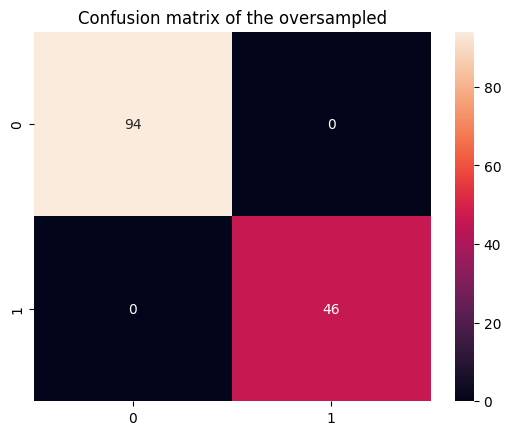

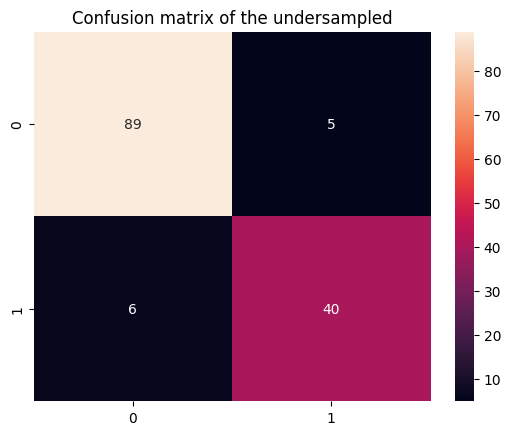

In [132]:
# Parameters for KNN
parameters_tree = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

evaluate_model(KNeighborsClassifier(), parameters_tree, all_inputs_os, all_labels_os, test_inputs, test_labels , "oversampled")
evaluate_model(KNeighborsClassifier(), parameters_tree, all_inputs_us, all_labels_us, test_inputs, test_labels , "undersampled")

Most of the times, KNN performs well. However, it has almost always an inferior performance than the previous algorithm, the decision tree.

## Support Vector Machine

Best score: 0.9329778672032193
Best parameters: {'C': 100, 'gamma': 0.1}
Accuracy: 95.71428571428572
              precision    recall  f1-score   support

           B       0.98      0.96      0.97        94
           M       0.92      0.96      0.94        46

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140

Best score: 0.9179442508710801
Best parameters: {'C': 100, 'gamma': 0.01}
Accuracy: 95.71428571428572
              precision    recall  f1-score   support

           B       0.96      0.98      0.97        94
           M       0.95      0.91      0.93        46

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



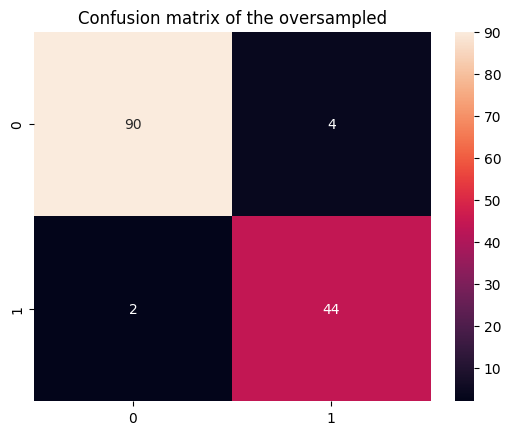

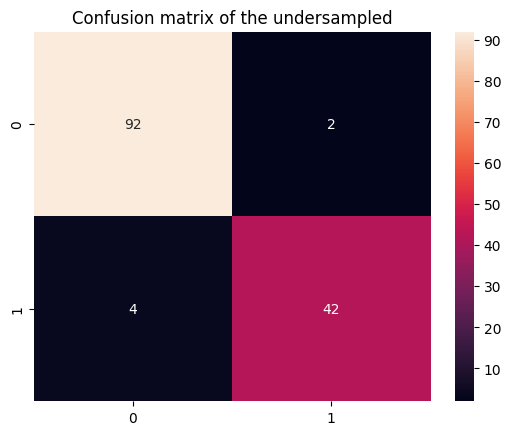

In [134]:
# Parameters for SVM
parameters_tree = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
}

evaluate_model(SVC(), parameters_tree, all_inputs_os, all_labels_os, test_inputs, test_labels , "oversampled")
evaluate_model(SVC(), parameters_tree, all_inputs_us, all_labels_us, test_inputs, test_labels , "undersampled")

## Neural Network

/home/sparks/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sparks/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sparks/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sparks/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sparks/.local/lib/python3.10/site-packages

Best score: 0.9344466800804829
Best parameters: {'alpha': 0.01, 'max_iter': 500}
Accuracy: 94.28571428571428
              precision    recall  f1-score   support

           B       0.99      0.93      0.96        94
           M       0.87      0.98      0.92        46

    accuracy                           0.94       140
   macro avg       0.93      0.95      0.94       140
weighted avg       0.95      0.94      0.94       140



/home/sparks/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sparks/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sparks/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sparks/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sparks/.local/lib/python3.10/site-packages

Best score: 0.9422183507549363
Best parameters: {'alpha': 0.0001, 'max_iter': 1000}
Accuracy: 90.0
              precision    recall  f1-score   support

           B       0.98      0.87      0.92        94
           M       0.79      0.96      0.86        46

    accuracy                           0.90       140
   macro avg       0.88      0.91      0.89       140
weighted avg       0.91      0.90      0.90       140



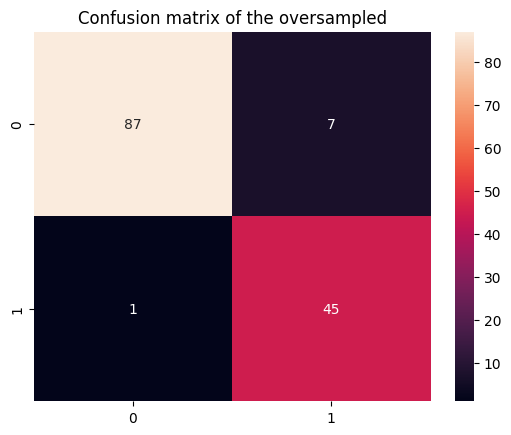

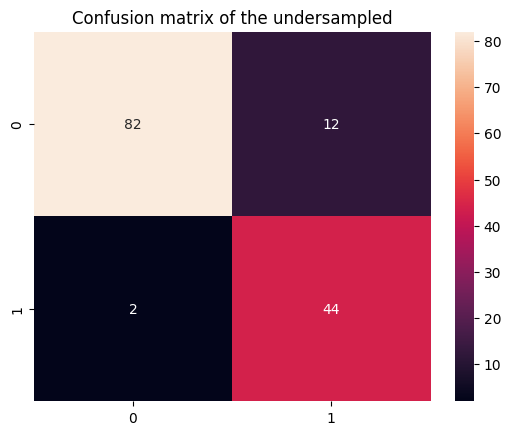

In [135]:
parameters_tree = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [100, 300, 500, 1000]
}

evaluate_model(MLPClassifier(), parameters_tree, all_inputs_os, all_labels_os, test_inputs, test_labels , "oversampled")
evaluate_model(MLPClassifier(), parameters_tree, all_inputs_us, all_labels_us, test_inputs, test_labels , "undersampled")